**Context**
credit card transactions - fraud detection
-> 구매하지 않은 상품에 대해 charge되지 않도록 하는 것이 목표
(customers are not charged for items that they did not purchase)

**Content**
* credit card transaction data
* 생성 일자: September 2013 by European cardholders
* 기간 : 2 days
* 284807 행 중 492 개(0.172%)의 fraud = highly unbalanced
* feature:

  1) V1,V2, ... V28 : PCA를 통해 numerical input variable만 있음

  (이유: confidentiality issue로 원본 feature 및 background 데이터 제공 불가)

  2) 'Time': 첫 거래부터 경과된 seconds  
  3) 'Amount' : 거래량
  ->  example-dependant cost-sensitive learning에 쓰일 수 있음

  4) 'Class': 1=fraud, 0=정상

* Performance Metric: 'AUPRC' : Area Under the Precision-Recall Curve
(이유: imbalance ratio가 심해서 confusion matrix accuracy는 의미 없음)

Credit Card Fraud Detection System

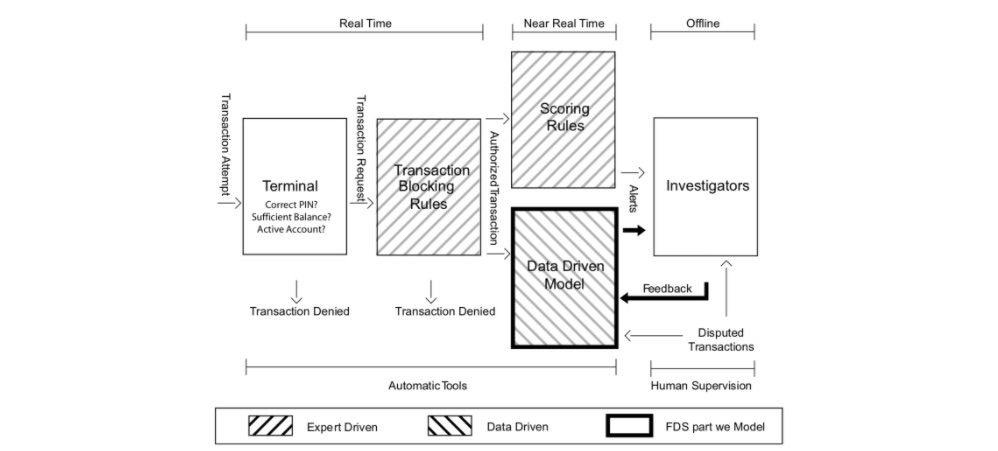

DDM: 조사자의 경험을 넘어서는 규칙에 따라 사기를 발견할 것으로 예상되며, 해석 가능한 규칙과 반드시 일치하지 않을 수도 있습니다

**고객의 신뢰를 망치지 않는 것이 중요, 사기는 탐지하되 고객의 편의성은 망치지 않는 것이 중요**

## Fraud Scenario
1. Card-present 오프라인: physical card is needed, such as transactions at a store (also referred to as a point-of-sale - POS) or transactions at a cashpoint (for instance at an automated teller machine - ATM)

* Lost or stolen card:
* Counterfeited card (A fake card)
* Card not received : intercepted by a fraudster, delivered to a different address, fraudster manages to order a new card without the knowledge of the legitimate customer (for example by accessing fraudulently their bank account)

2. Card-not-present (CNP) 온라인: physical card does not need to be used, which encompasses payments performed on the Internet, by phone, or by mail.
* 악용 data: the card number, card expiration date, card security code, and personal billing information (such as the cardholder’s address)

현재는 칩 내장 카드(EMV 기술) 덕분에 CP 시나리오 예방 -> CNP가 더 악용됨

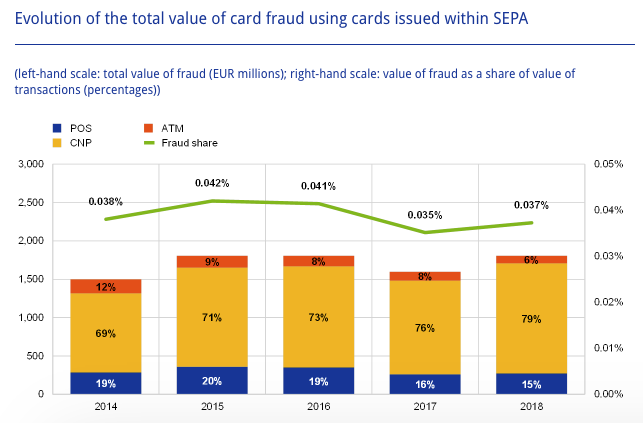

Transaction Feature


1.  The transaction ID: A unique identifier for the transaction

2. The date and time: Date and time at which the transaction occurs

3. The customer ID: The identifier for the customer. Each customer has a unique identifier

4. The terminal ID: The identifier for the merchant (or more precisely the terminal). Each terminal has a unique identifier

5. The transaction amount: The amount of the transaction.

6. The fraud label: A binary variable, with the value
 for a legitimate transaction, or the value
 for a fraudulent transaction.



Customer Profile

* (x_customer_id,y_customer_id): A pair of real coordinates (x_customer_id,y_customer_id) in a 100 * 100 grid, that defines the geographical location of the customer

* (mean_amount, std_amount): The mean and standard deviation of the transaction amounts for the customer, assuming that the transaction amounts follow a normal distribution. The mean_amount will be drawn from a uniform distribution (5,100) and the std_amount will be set as the mean_amount divided by two.

* mean_nb_tx_per_day: The average number of transactions per day for the customer, assuming that the number of transactions per day follows a Poisson distribution. This number will be drawn from a uniform distribution (0,4).

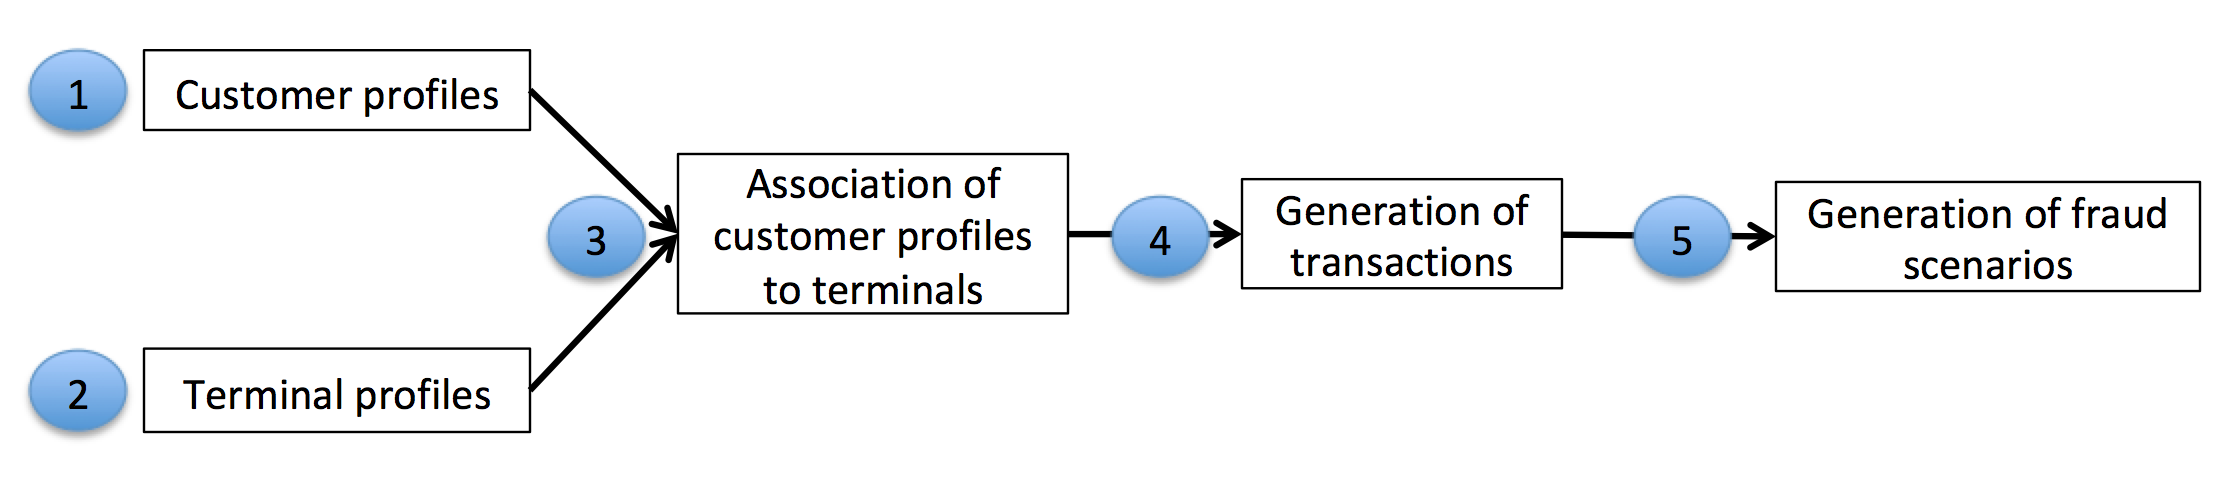

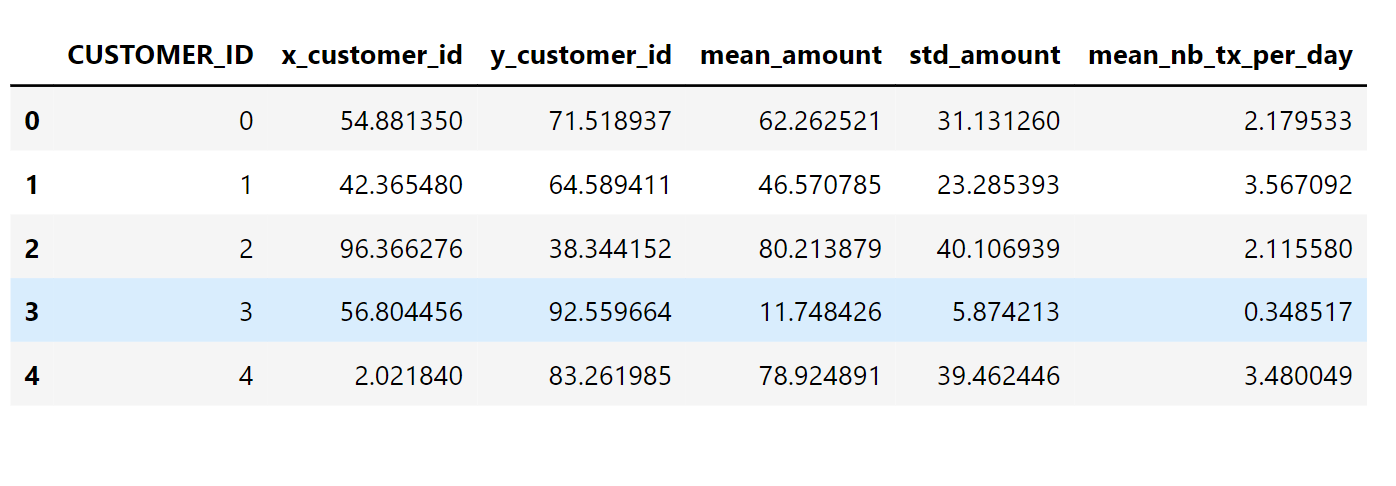

The locations of all terminals (in red)

The location of the last customer (in blue)

The region within radius of 50 of the first customer (in green)

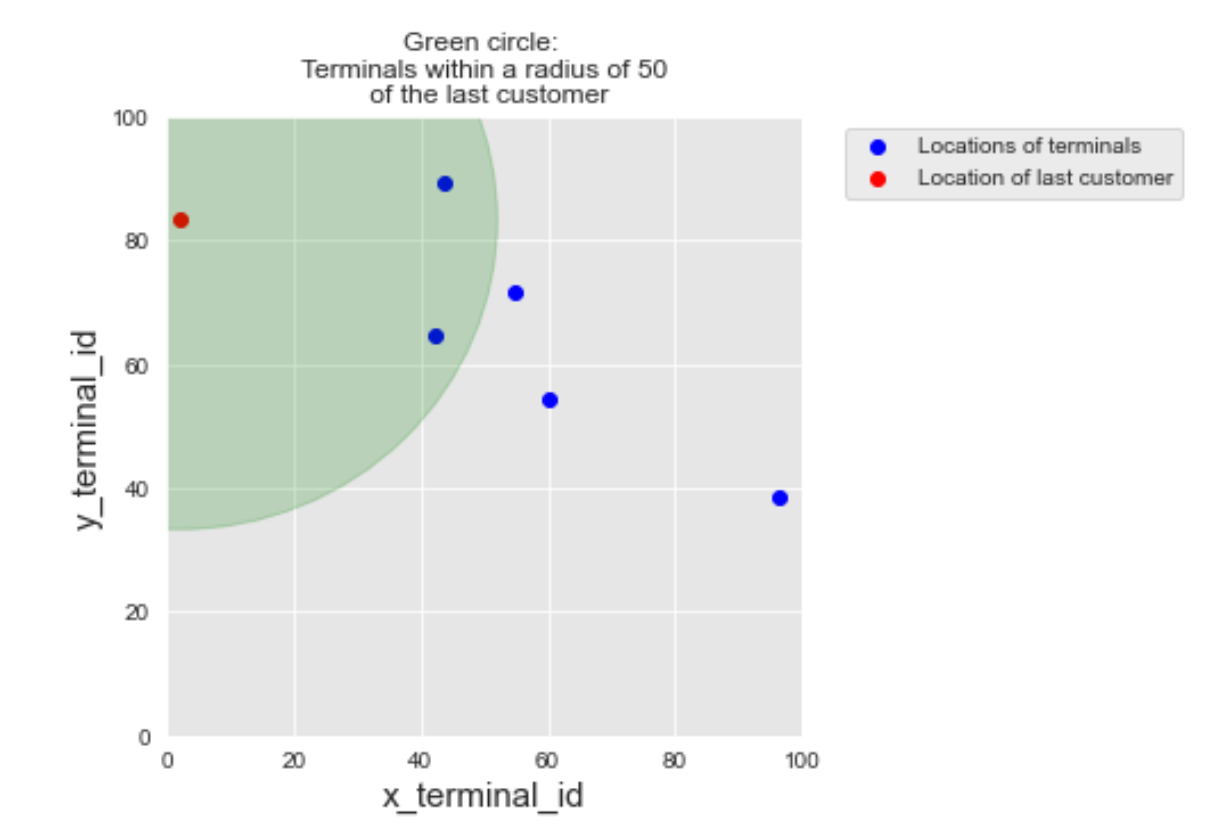

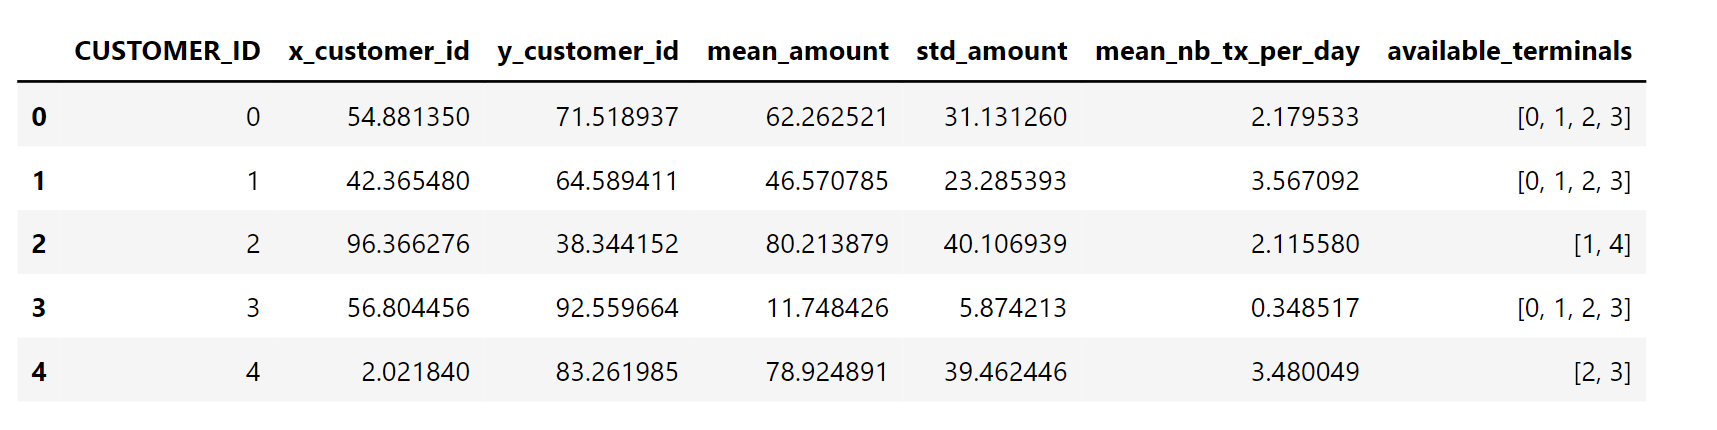

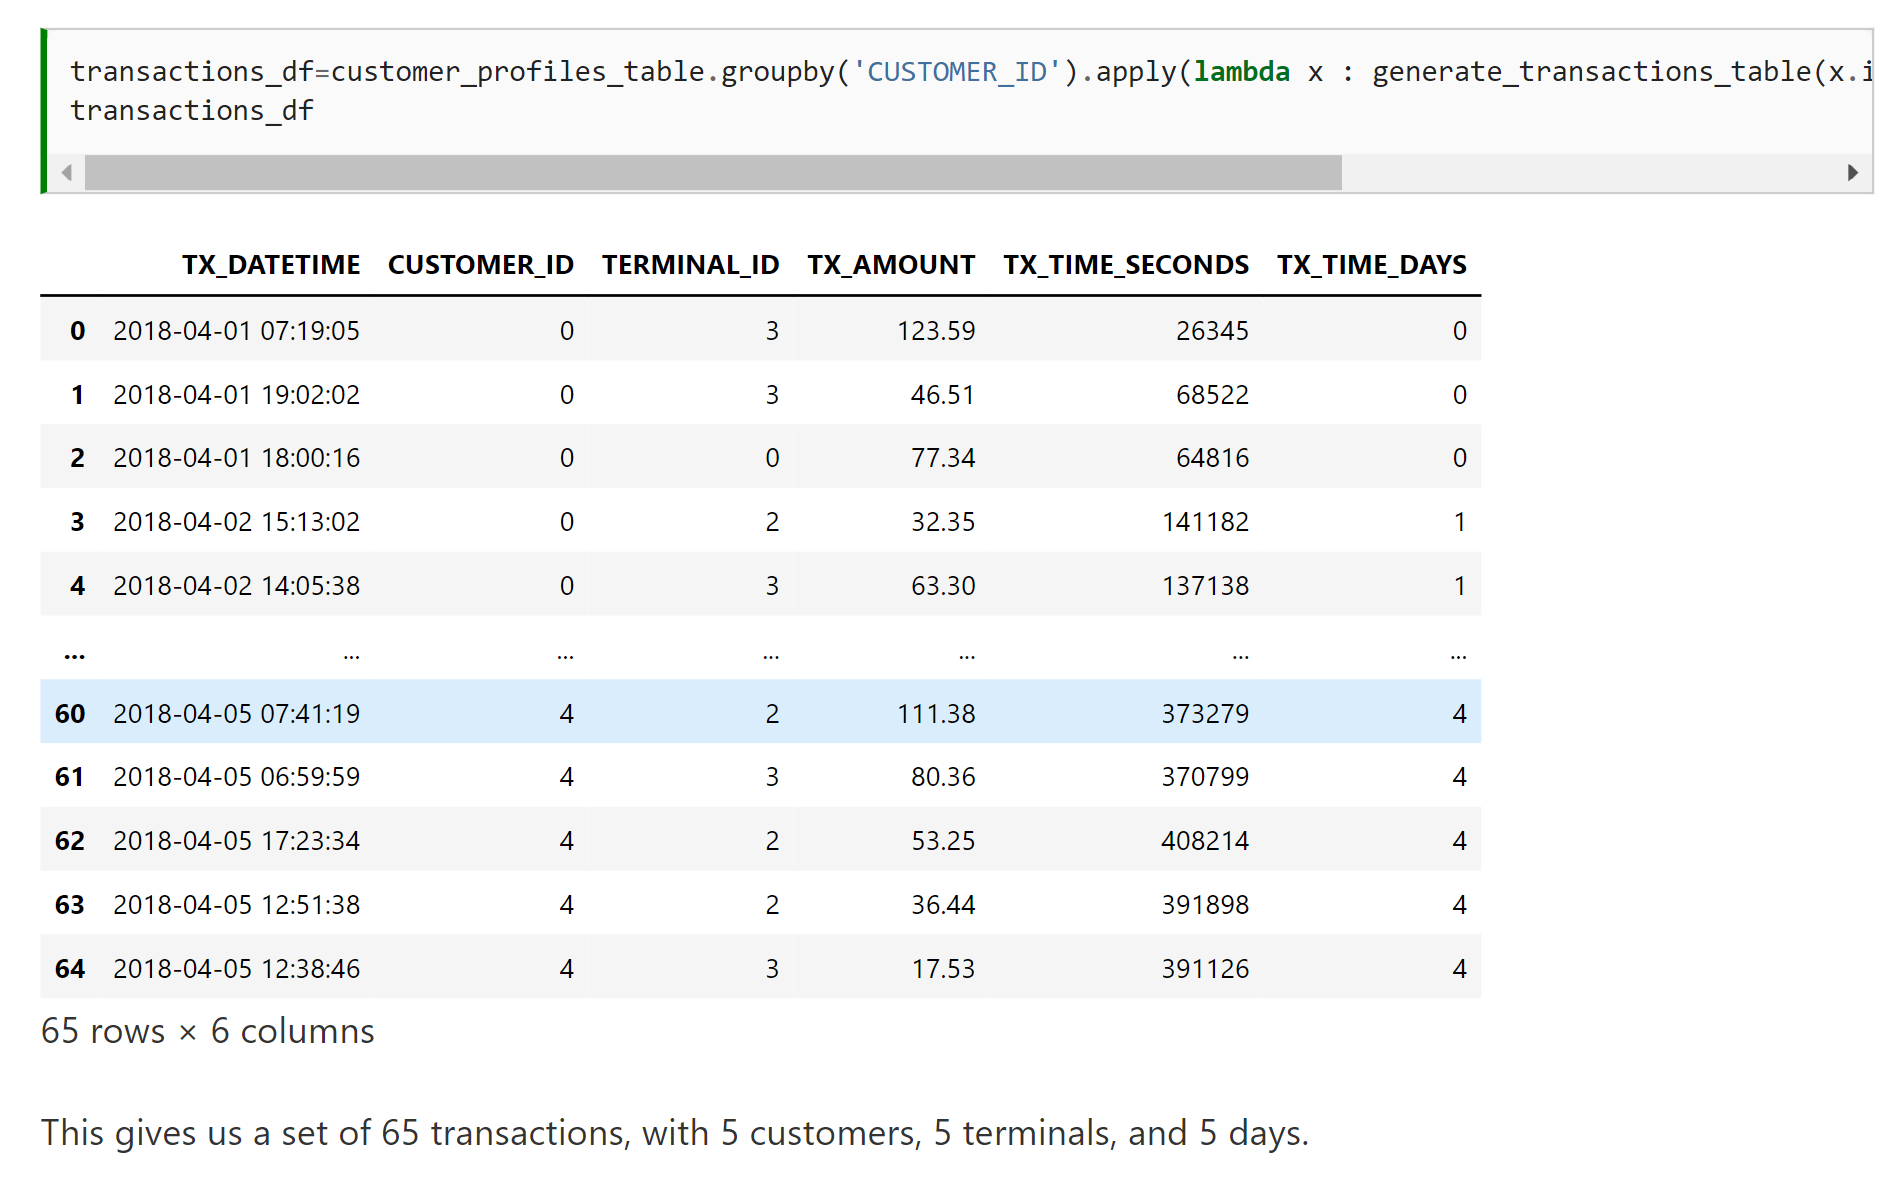

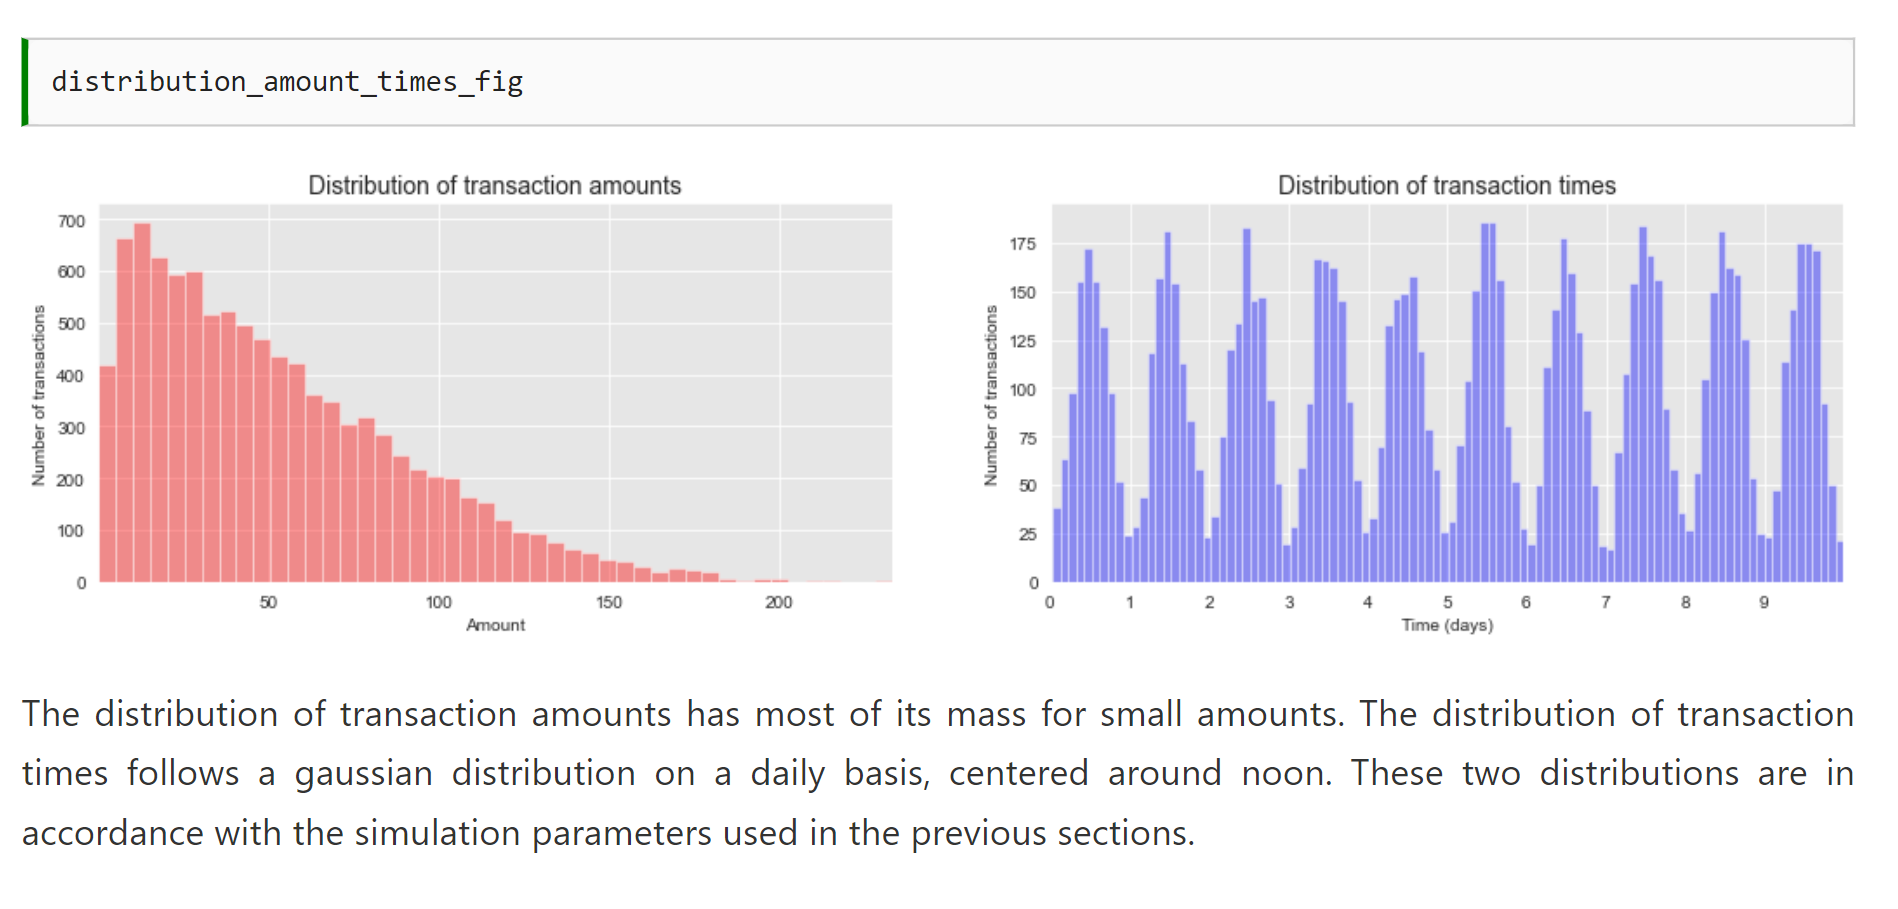

Fraud Scenario Generation

시나리오 1: **금액 기준**
* 금액이 220을 초과하는 모든 거래는 사기
(실제 시나리오에서 영감을 얻은 것 X)
* 그보다는 모든 기본 사기 탐지기가 탐지해야 하는 명백한 사기 패턴으로써, 사기 탐지 기술의 구현을 검증하는 데 유용

시나리오 2: **terminal의 손상;a criminal use of a terminal, through phishing**
* 매일 두 대의 단말기 목록이 무작위로 추첨되는데, 다음 28일 동안 이 단말기에서 발생하는 모든 거래는 사기 거래로 표시됨
* 단말기의 사기 거래 횟수를 추적하는 기능을 추가하면 감지할 수 있음.
* 단말기는 28일 동안만 손상되므로 이 시나리오를 효율적으로 처리하려면 개념 이동을 포함하는 추가 전략을 설계해야 함

시나리오 3: **고객명의도용,card-not-present fraud**
* 매일 3명의 고객 목록이 무작위로 추첨되고 이후 14일 동안 해당 고객의 거래 중 1/3에 5를 곱한 금액이 사기 거래로 표시됨
* 고객은 계속해서 거래를 하고, 사기범은 자신의 이익을 극대화하기 위해 더 높은 금액의 거래를 하는 패턴.
* 이 시나리오를 탐지하려면 고객의 지출 습관을 추적하는 기능을 추가해야 함
* 시나리오 2의 경우 카드가 일시적으로만 손상되었으므로 concept drift을 포함하는 추가 전략도 설계해야 함.

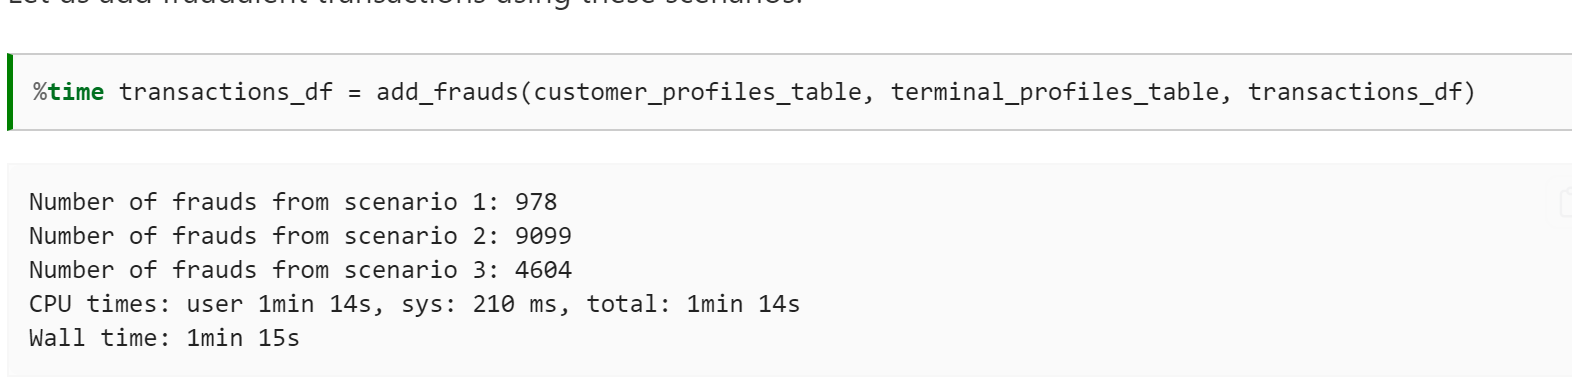

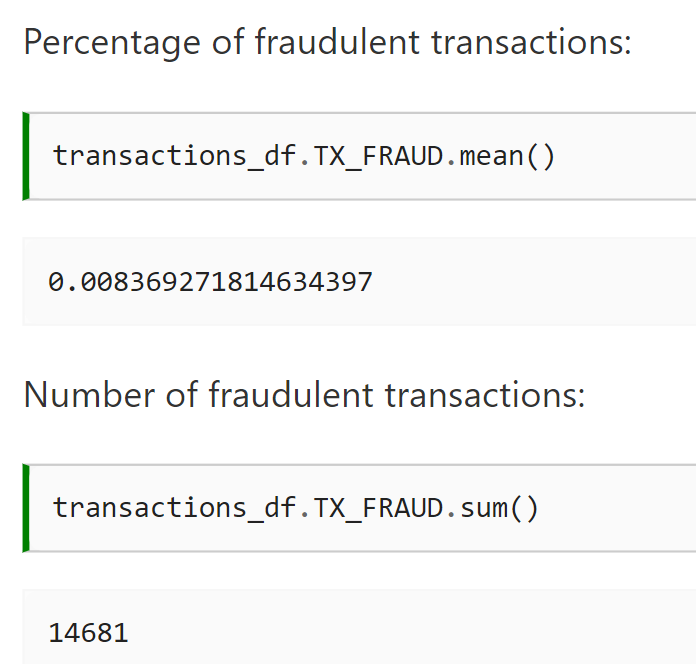

Note that the **sum of the frauds for each scenario does not equal the total amount of fraudulent transactions**. This is because the same transactions may have been marked as fraudulent by **중복집계:two or more fraud scenarios**

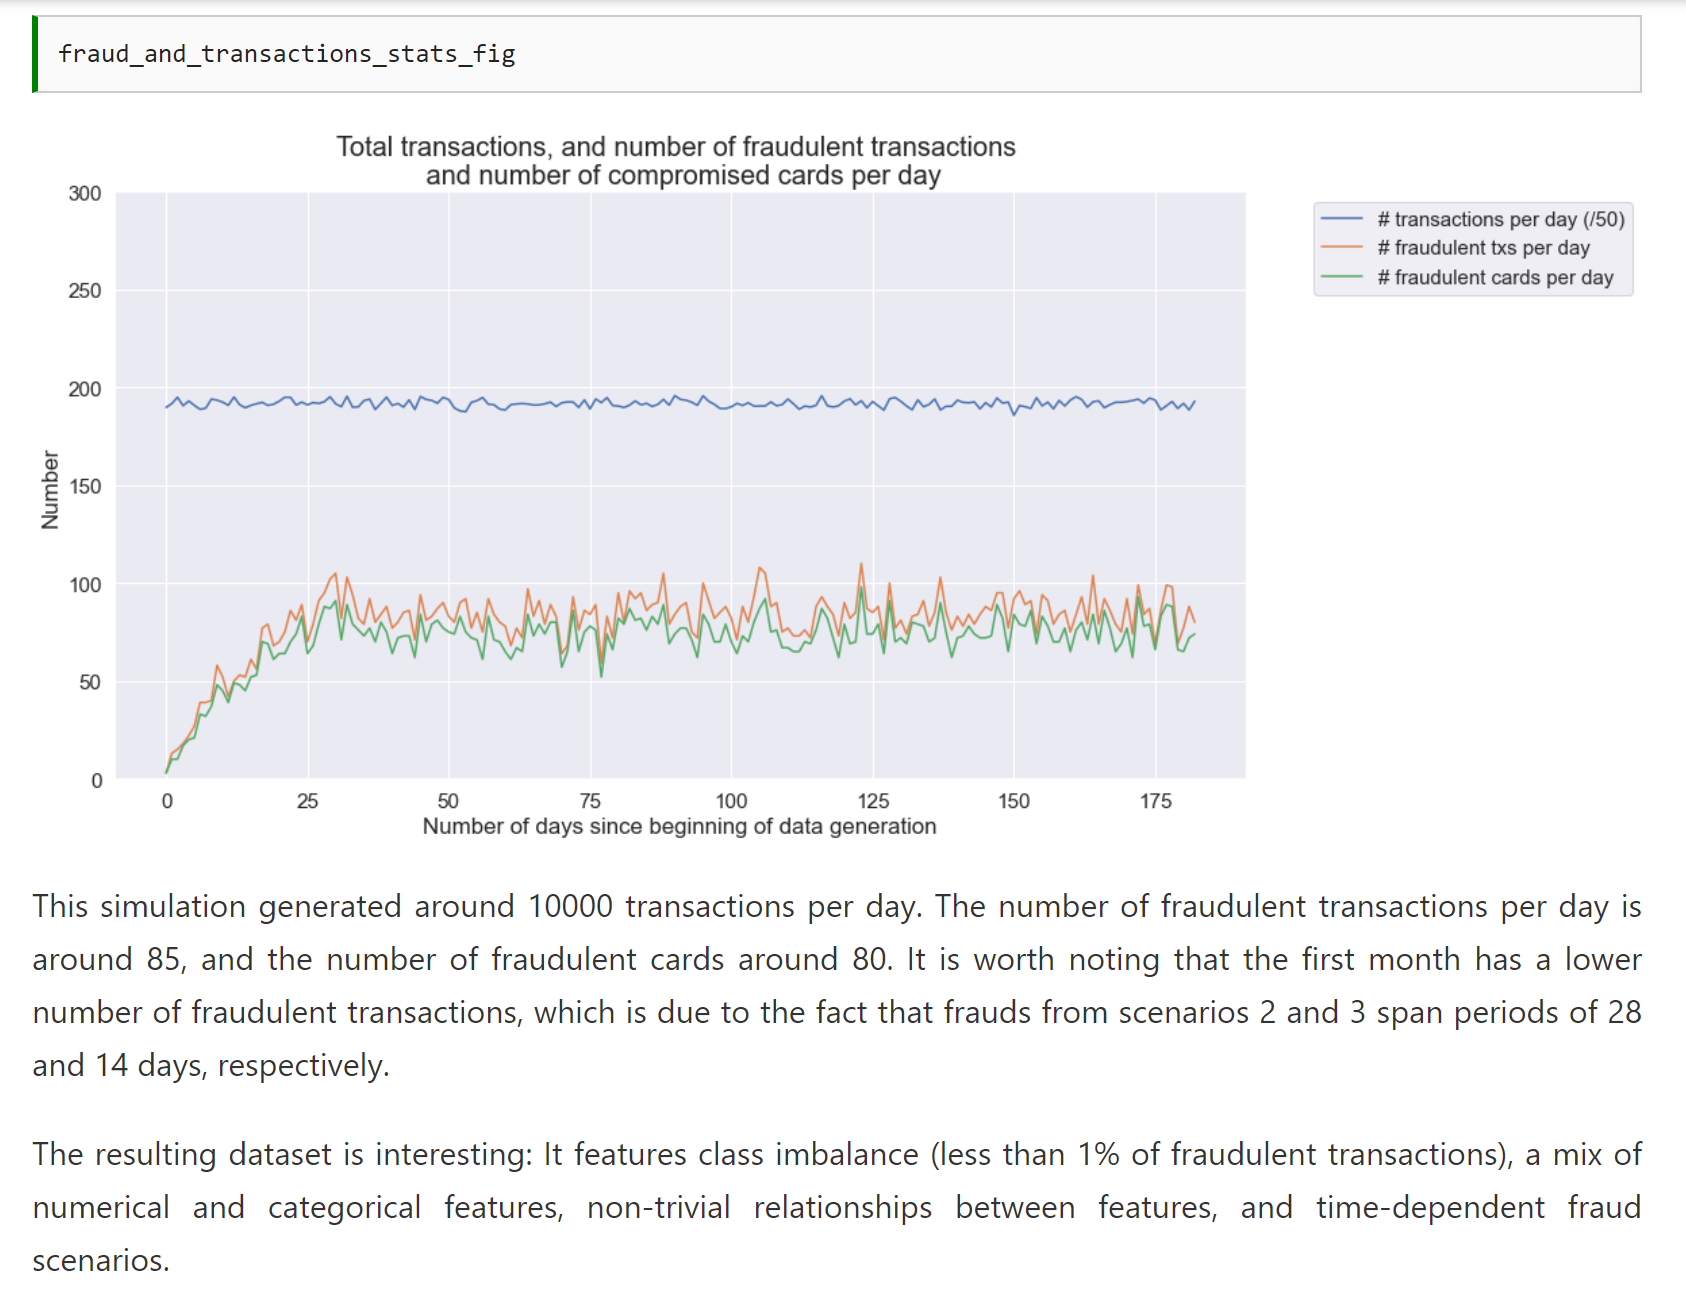

## ML in Credit Card fraud Detection

* Class imbalance : 실제 데이터 세트에서 사기 거래의 비율은 일반적으로 1% 미만 ->  imbalanced learning (sampling or loss weighting) 샘플링 또는 손실 가중치

* Concept drift : 사기 수법이 시간에 따라 변화함. 시간에 따른 거래 및 사기 분포의 변화 / 신용카드 사용자의 지출 습관은 주중, 주말, 휴가 기간에 따라 다르며, 사기꾼들은 오래된 수법이 구식이 되면 새로운 수법을 채택 -> online learning(temporal changes in statistical distributions), real world에서는 delayed feedbacks 때문에 더 부각되는 문제점

* Near real-time requirements: high-volume 데이터에 빠른 동작 필요, millions of transactions per day), classification times as low as tens of milliseconds, -> 병렬화&scalability

* Categorical features : 범주형 변수가 많은 데이터셋 특징 (ID of a customer, a terminal, the card type 등) -> feature aggregation, graph-based transformation, or deep-learning approaches such as feature embeddings.

* Sequential modeling : sequential stream data -> 목표: '예상' '행위'를 characterize 하기, '언제' 비정상행위 일어나는지 탐지 -> modeling1: 기간으로 feature 합치기 (e.g. 평균/빈도 keeping track of the mean frequency or transaction amounts of a customer), modeling2: relying on sequential prediction models, LMTS같이 앞뒤의 맥락을 고려하는 느낌인듯 (such as hidden Markov models: 은닉된 state를 추론, or recurrent neural networks for example).
  * 지출내역을 통해 과거의 행동을 유추하는 문제
  * 오늘 하려는 행동은 과거에 무엇을 했는지에 영향을 받으며, 과거에 했던 행동은 과거로 돌아가지 않는 한 다시는 관측할 수 없기 때문에 과거의 행동은 은닉된 state에 해당
  * Q={Study,Friend,Game}, 지출내역은 카드명세서를 통해 과거의 내역이더라도 직접적으로 관측할 수 있기 때문에 observation에 해당한다. Y={1,2,3,4} 값이 클 수록 돈을 많이 사용했다는 것을 의미한다.
  * 지출 내역이 1 1 4 2일 때, 이러한 지출 내역이 나타날 확률 계산
  * 지출 내역이 1 1 4 2일 때, 이러한 지출 내역이 나타날 확률이 가장 큰 과거의 행동 추론
  * 지출내역이 1, 3, 2, 1, 2인 경우, Viterbi algorithm을 이용하여 찾은 최적의 state는 study, friend, game, study, game이 된다. 따라서, 우리는 과거의 지출내역이 1, 3, 2, 1, 2인 경우, 가장 높은 확률로 과거 5일동안 공부, 친구 만나기, 게임, 공부, 게임를 했었다고 생각할 수 있다.

* Class overlap:  raw information 만으로는 정상/비정상 탐지가 어려움 -> feature engineering 으로 contextual information를 raw payment information에 추가해줘야 함

* Performance measures : 아직까지 합의 X but 사기 거래의 탐지를 극대화하는 동시에 잘못 예측된 사기(오탐)의 수를 최소화할 수 있어야 합니다  minimizing the number of incorrectly predicted frauds (false positives)

* Lack of public datasets : 명백한 기밀 유지의 이유로 실제 신용카드 거래는 공개적으로 공유할 수 없습니다. 공개적으로 공유되는 데이터 세트는 2016년에 저희 팀이 Kaggle[Kag16]에서 제공한 단 하나의 데이터 세트가 존재

* cost-sensitive learning : 학습 절차에서 오분류 비용에 의존할 때의 이점은 데이터 세트의 특성과 최적화할 성능 지표에 따라 크게 달라지는 것으로 보입니다. 이 섹션에서 제공된 실험에 따르면 비용에 민감한 학습은 분류기의 결정 경계를 효과적으로 이동시키고 소수 클래스의 분류를 선호할 수 있음을 보여주었습니다. 그러나 AUC ROC와 평균 정밀도 측면에서는 이점이 상충되는 것으로 보입니다. 특히, 결정 경계의 이동은 많은 오탐으로 이어져 정밀도에 부정적인 영향을 미치고, 따라서 평균 정밀도 측면의 성능에 부정적인 영향을 미치는 것으로 보입니다.

클래스 불균형(사기 거래의 1% 미만), 숫자 및 범주형 특징의 혼합(매우 많은 수의 값을 포함하는 범주형 특징 포함), 특징 간의 사소하지 않은 관계, 시간에 따른 사기 시나리오 등이 포함될 것입니다.

https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_3_GettingStarted/SimulatedDataset.html

<h1 align="center"> Credit Fraud Detector </h1>

<h2> Our Goals: </h2>
<ul>
<li> Understand the little distribution of the "little" data that was provided to us. </li>
<li> Create a 50/50 sub-dataframe ratio of "Fraud" and "Non-Fraud" transactions. (NearMiss Algorithm) </li>
<li> Determine the Classifiers we are going to use and decide which one has a higher accuracy. </li>
<li>Create a Neural Network and compare the accuracy to our best classifier. </li>
<li>Understand common mistaked made with imbalanced datasets. </li>
</ul>


<h2> Outline: </h2>
I. <b>Understanding our data</b><br>

II. <b>Preprocessing</b><br>
a) [Scaling and Distributing](#distributing)<br>
b) [Splitting the Data](#splitting)<br><br>

III. <b>Random UnderSampling and Oversampling</b><br>
a) [Distributing and Correlating](#correlating)<br>
b) [Anomaly Detection](#anomaly)<br>
c) [Dimensionality Reduction and Clustering (t-SNE)](#clustering)<br>
d) [Classifiers](#classifiers)<br>
e) [A Deeper Look into Logistic Regression](#logistic)<br>
f) [Oversampling with SMOTE](#smote)<br><br>

IV. <b>Testing </b><br>
a) [Testing with Logistic Regression](#testing_logistic)<br>
b) [Neural Networks Testing (Undersampling vs Oversampling)](#neural_networks)

<h2>Correcting Previous Mistakes from Imbalanced Datasets: </h2>
<ul>
<li> Never test on the oversampled or undersampled dataset.</li>
<li>If we want to implement cross validation, remember to oversample or undersample your training data <b>during</b> cross-validation, not before! </li>
<li> Don't use <b>accuracy score </b> as a metric with imbalanced datasets (will be usually high and misleading), instead use <b>f1-score, precision/recall score or confusion matrix </b></li>
</ul>

## Gather Sense of Our Data:
<a id="gather"></a>
나머지는 다 PCA된 거고 일단 볼 수 있는 Amount를 분석하자.

<h3> Summary: </h3>
<ul>
<li>Transaction Amount가 생각보다 작다. 모든 거래량의 평균이 approximately USD 88. </li>
<li>NULL 없어서 결측치 제거 안해줘도 됨</li>
<li> 99.83%, 0.17% 의 극단적인 imbalance </li>
</ul>

<h3> Feature Technicalities: </h3>
<ul>
<li> V feature들은 Scaling 이후에 PCA가 진행됨 (이미 진행된 것)
</li>
</ul>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('/content/drive/MyDrive/KUBIG/데이터분석 스터디/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#결측치 없음
df.isnull().sum().max()

0

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# Imbalance
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


**Imbalance한 dataset을 그대로 prediction model을 만들면 생기는 문제점**:

1. Precision을 높이기 위해 그냥 다 '정상'이라고 판단해버리는 모델이 될 수 있음

2. Overfitting

3. Wrong Correlations: class랑 feature간의 관계를 보고 싶은데 imbalance dataframe에서는 할 수가 없음 (아무리 V feature 내용이 뭔지 모른다고 하더라도 그냥 correlation, 얼마나 y에 영향을 미치는지는 알면 좋은데)

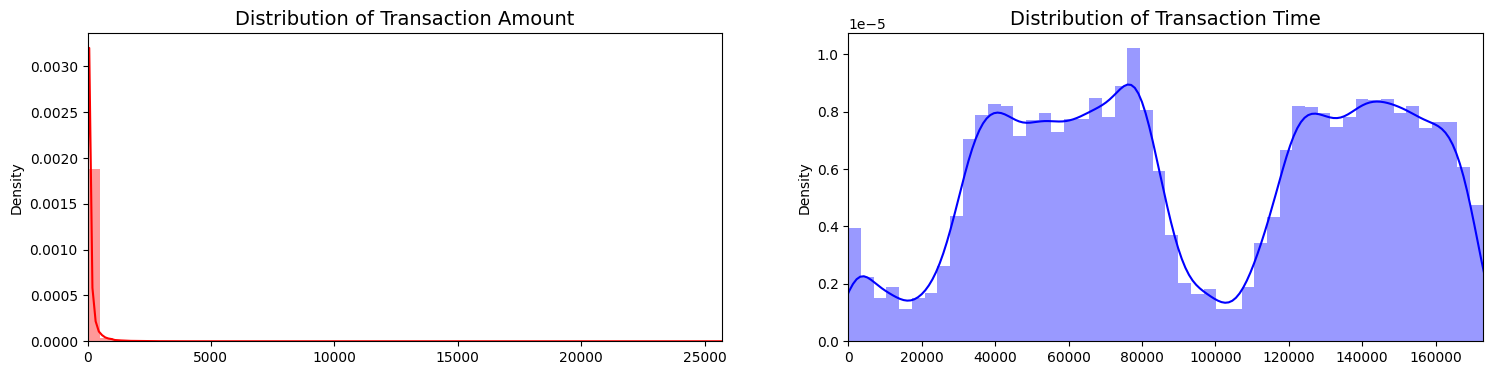

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

<h2> Scaling and Distributing </h2>
<a id="distributing"></a>

1. Time, Amount도 나머지 V features처럼 scaling해주자.

2. Sampling을 해서 balance를 맞춰주자.
  * 50:50 ratio
  * 492 case Fraud -> random으로 492개의 non-Fraud를 뽑아서 sub-sample을 만들어줌

In [ ]:
#Scale을 해주자 amount, time
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler: less prone to outliers
# 데이터의 중앙값을 뺀 다음, 사분위수 범위(IQR, Interquartile Range)로 나누어 데이터를 스케일링
# 이 방법은 특히 이상치(outliers)에 덜 민감한 스케일링을 원할 때 유용
# 이상치의 영향을 최소화하고 더 공정한 분석

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount & Time scale

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Splitting the Data (Original DataFrame)
<a id="splitting"></a>
* Test는 original test여야 하고
* Train시킬 때만 sampling하는 것임
* 그야 목표는 원래 imbalance한 test dataset을 예측하는 것이니까
* 아무튼 train의 sampling에는 Random UnderSampling technique을 적용할 것임

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False) #shuffle=False로 해서 안 섞음 그냥 분할한
# 각 폴드에서 클래스 비율이 원본 데이터셋의 클래스 비율과 동일하도록 데이터를 분할

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)



# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
#y로 해서 label추출 -> fraud 몇개고 non-fraud 몇개고 count로 반환
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain)) #각 label별로 전체에서 몇 개 있는지 비율
print(test_counts_label/ len(original_ytest))

#train set과 test set의 레이블 분포를 비교하여, 두 세트가 원본 데이터의 클래스 비율을 잘 유지하고 있는지 확인

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 56953  56954  56955 ... 284804 284805 284806] Test: [    0     1     2 ... 60014 60398 61166]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56953  56954  56955 ... 119649 119897 120634]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113911 113912 113913 ... 175414 176250 178509]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170874 170875 170876 ... 227843 228355 228762]
Train: [     0      1      2 ... 227843 228355 228762] Test: [227844 227845 227846 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [ ]:
np.unique(original_ytrain, return_counts=True) #0라벨, 1라벨 -> 227452개, 394개

(array([0, 1]), array([227452,    394]))

In [ ]:
np.unique(original_ytest, return_counts=True)

(array([0, 1]), array([56863,    98]))

## Random Under-Sampling:

#### Steps:
* 50:50으로 맞춰줘야 돼서 492 case fraud 492 case non-fraud로  
* shuffle the data -> random_state =42 로 해서 재현성 확보: 항상 그 accuracy를 유지할 수 있는지 확인

**Note:**  "Random Under-Sampling" 의 리스크
:  <b>information loss</b>
* (이유: bringing 492 non-fraud transaction from 284,315 non-fraud transaction)

In [ ]:

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1) #무작위 샘플링, frac=비율 지정인데, frac=1은 전체 데이터를 의미

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1] #492개
non_fraud_df = df.loc[df['Class'] == 0][:492]#492개까지 제한 shuffle을 미리 해놓고 거기서 앞부터 492개 행 선택

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42) #new_df는 undersampling된 상태

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
180558,0.051701,0.468779,-1.155315,1.080884,0.053889,-0.535258,1.891685,-0.828109,1.271601,-0.318771,...,0.188893,-0.118671,0.106012,-0.722072,0.486358,1.108206,0.761403,-0.032086,-0.067276,0
57615,-0.296793,-0.431279,-1.232804,2.244119,-1.703826,1.492536,-1.192985,-1.686110,-1.864612,0.856122,...,0.207889,0.560475,0.165682,-0.013754,0.474935,-0.218725,0.302809,0.466031,0.250134,1
194779,3.185915,0.541137,1.571674,-0.537408,-2.125915,1.433633,0.275206,-1.156083,0.966482,-0.400964,...,0.110537,0.272665,0.222832,-0.121847,1.048864,0.279050,-0.557586,-0.091494,-0.014416,0
153835,-0.293440,0.183343,-22.341889,15.536133,-22.865228,7.043374,-14.183129,-0.463145,-28.215112,-14.607791,...,4.100019,-9.110423,4.158895,1.412928,0.382801,0.447154,-0.632816,-4.380154,-0.467863,1
123270,-0.293440,-0.091930,1.082566,1.094862,-1.367020,2.012554,0.708142,-0.807712,0.151952,0.158353,...,-0.135789,-0.325284,-0.734344,-0.106725,-0.224999,0.569167,-0.335033,0.089140,0.112337,1


##  Equally Distributing and Correlating:
<a id="correlating"></a>
* correctly balanced 데이터셋을 만들었음
* we can go further with our <b>analysis</b> and <b>data preprocessing</b>.

Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


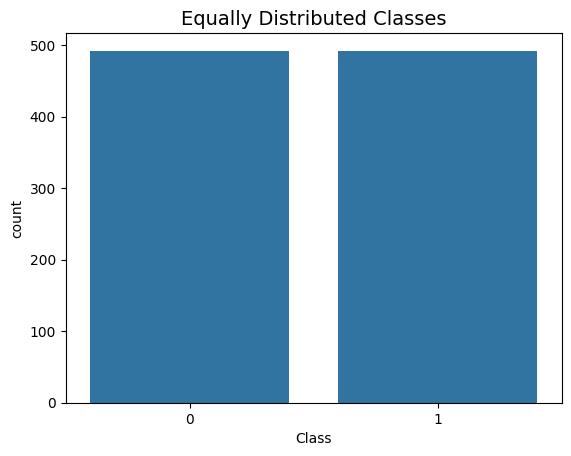

In [ ]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))


sns.countplot(x='Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

<h3> Correlation Matrices </h3>
* 각 feature와 Y와의 상관관계 분석
* heatmap이 파란색이 양수고 빨간색이 음수라서 잘 봐야 됨 ;

### Summary and Explanation:
Negative Correlations:
* V17, V14, V12 and V10 are negatively correlated
* 값이 작아지면 Fraud일 가능성 높아짐

Positive Correlations:
* V2, V4, V11, and V19 are positively correlated
* 값이 커지면 Fraud일 가능성 높아짐

**Note:**
* subsample correlation matrix(undersample한)로 봐야 됨
* 원래 correlation matrix로 보면 imbalance가 영향을 미쳐서 class에 미치는 영향관계를 제대로 볼 수 없음.

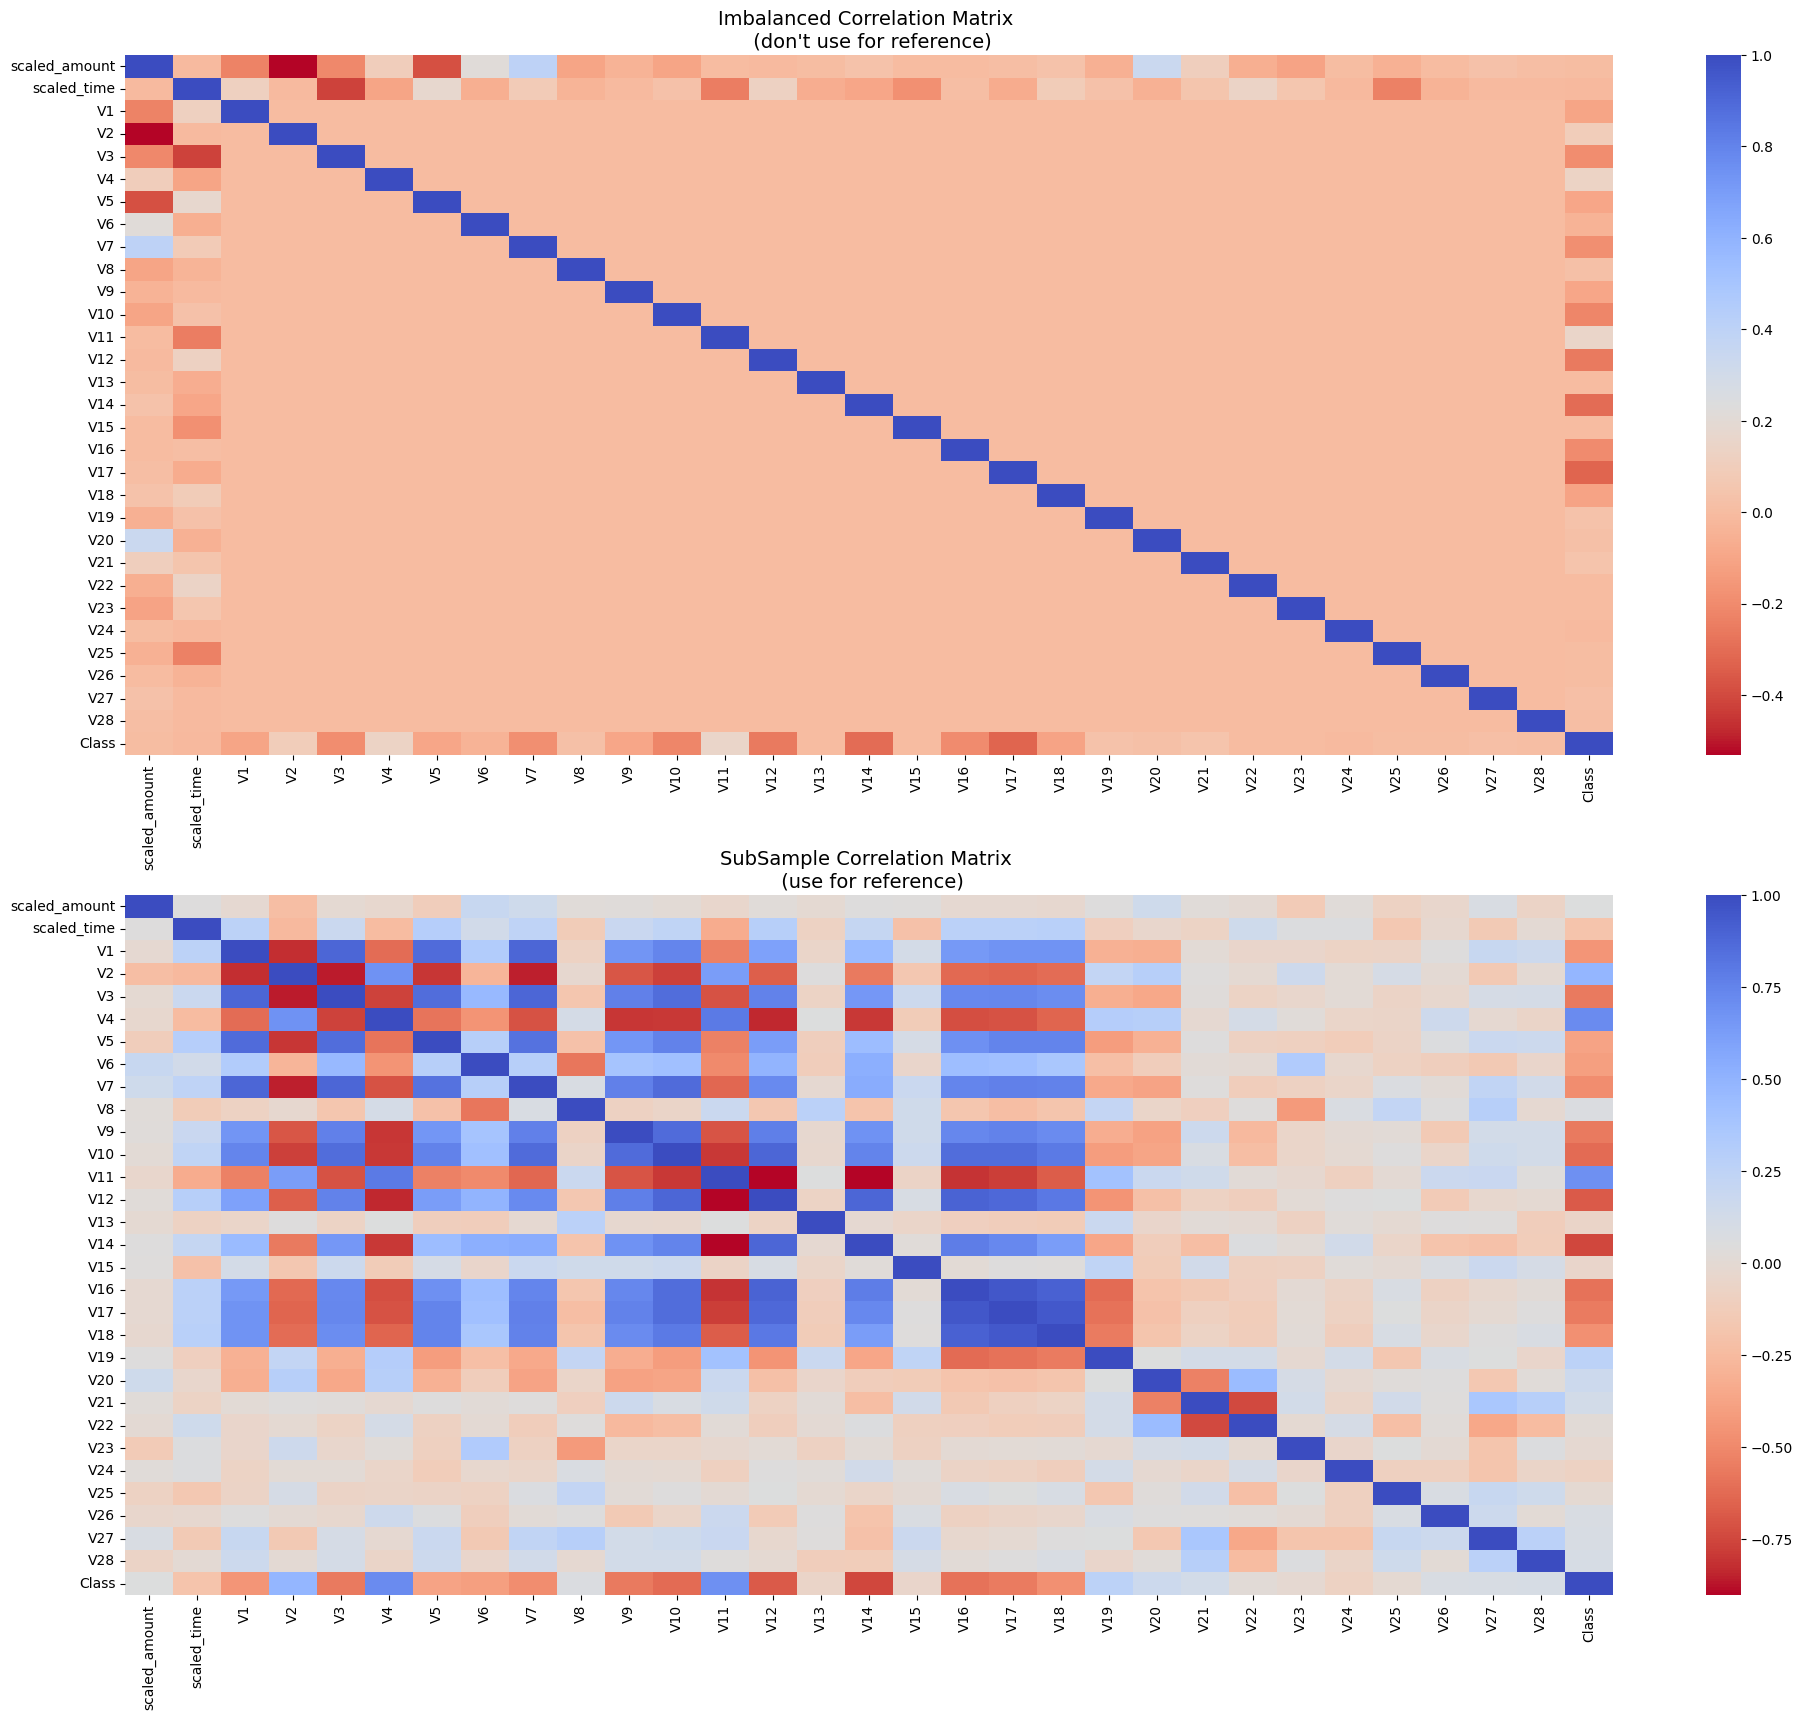

In [ ]:
# 의문....어째서 v17,v14,v12,v10만 negative로 뽑았나...v3도 강하지 않나....

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

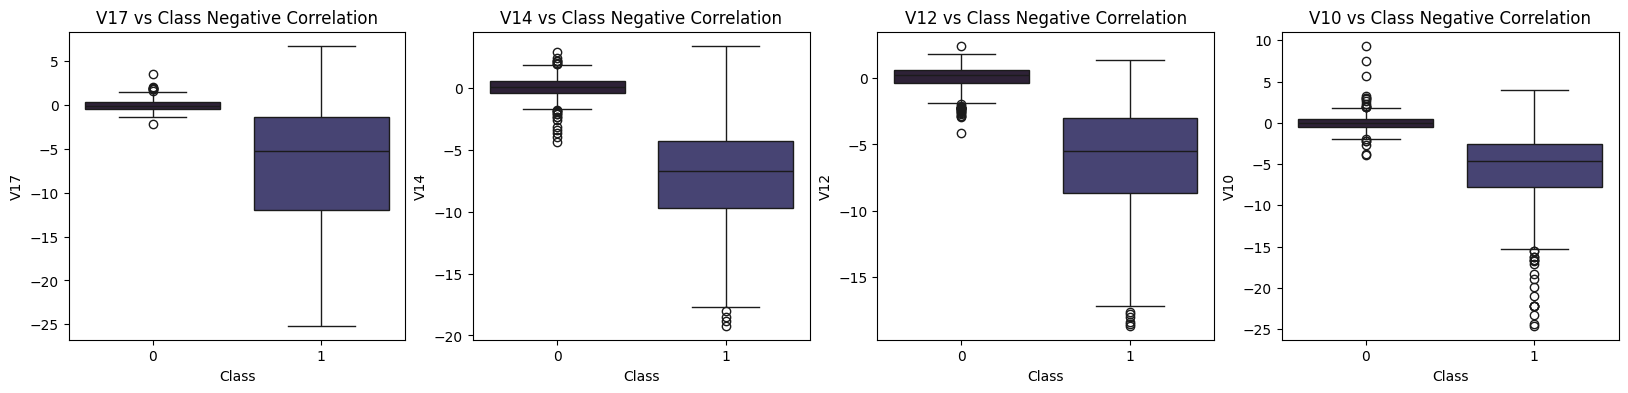

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
colors = sns.color_palette("mako")

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()
#실제로도 v값이 낮으면 1임.
#y축 v값 기준으로 값이 0이거나 그 이상이면 class가 0이고
#y축 v값이 - 음수로 떨어지면 class 1로 분류됨
#보라색이 검정색보다 아래에 분포

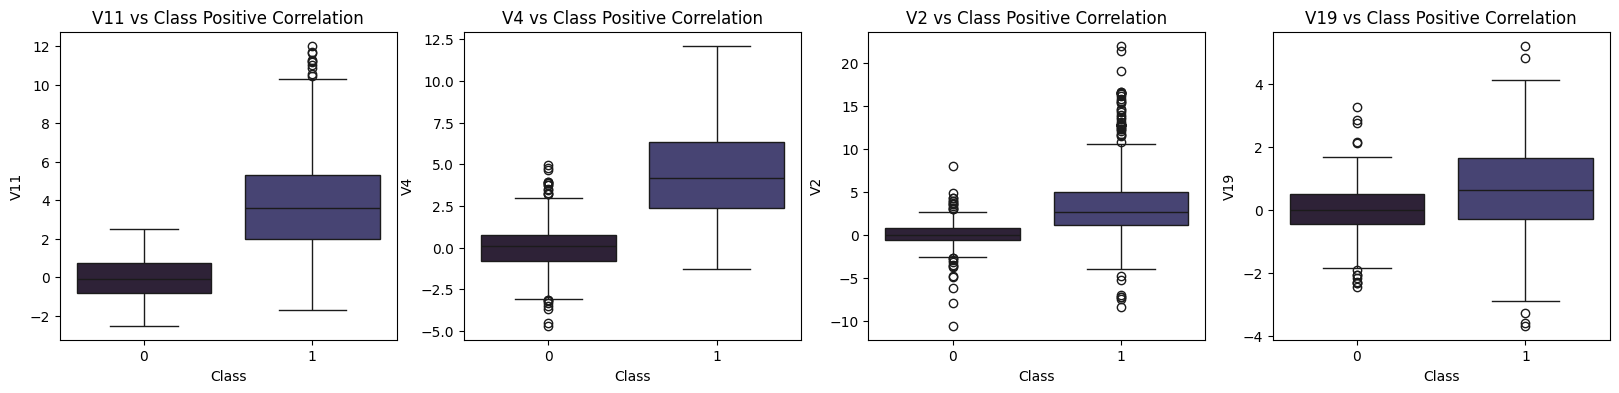

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()
#양의 상관관계 : 높으면 fraud 1이다
#y축 v값기준으로 높으면 class 1로 분류됨
#보라색이 검정색보다 위에 분포

## Anomaly Detection:
* outlier 제거 : y와 높은 상관관계가 있는 feature에게서 extreme outlier를 제거함 (높은 상관관계가 있는데 이상치가 있으면 그 이상치의 영향을 y가 크게 받기 때문)
* 효과: accuracy 향상

### Interquartile Range Method:
<ul>
<li> <b>Interquartile Range (IQR): </b> 제3사분위 제1사분위 percentile 의 차이로 계산 -> 25th~75th percentile threshold 넘으면 삭제

<li> <b>Boxplots: </b> 이상치 보기가 쉬움. 일단 1사분위 3사분위가 각 box의 아래 끝과 위 끝임. </li>
</ul>

### Outlier Removal Tradeoff:
threshold for removing outliers 정하기
* 현재 threshold: IQR * 1.5
* Threshold가 높으면(IQR*3) outlier가 적게 탐지=삭제됨
* Threshold가 낮으면 outlier가 너무 많이 탐지 = 삭제됨  <br><br>

**The Tradeoff: **
* Threshold가 낮으면 outlier 많이 삭제되지만, 이게 꼭 'extreme'한 outlier만 삭제하는 것은 아니라서 오히려 information loss로 lower accuracy가 될 수 있음

### Summary:
<ul>
<li> <b> 분포 시각화: </b>  V14만 가우시안 분포고 V12,V10은 아님. 일단 얘네 시각화해서 이상치 볼 것임 </li>
<li><b>Threshold 정하기: </b> IQR에 얼마 곱할지 정하고 나서 upper threshold, lower threshold 를 정할 것. by substrating q25 - threshold (lower extreme threshold) and adding q75 + threshold (upper extreme threshold). </li>
<li> <b>조건부 Dropping: </b> if the "threshold" is exceeded in both extremes, the instances will be removed. </li>
<li> <b> 다시 Boxplot 시각화: </b>  "extreme outliers"가 진짜 잘 줄어들었는지 확인 </li>
</ul>

**Note:**
* 성능 향상 효과: outlier reduction 이후 accuracy가 over 3% 상승함.-> accuracy를 왜곡하는 outlier를 알맞게 삭제한듯.
* 그래도 너무 많이 outlier 지워버리면 underfitting이 된다. (extreme amount of information loss)

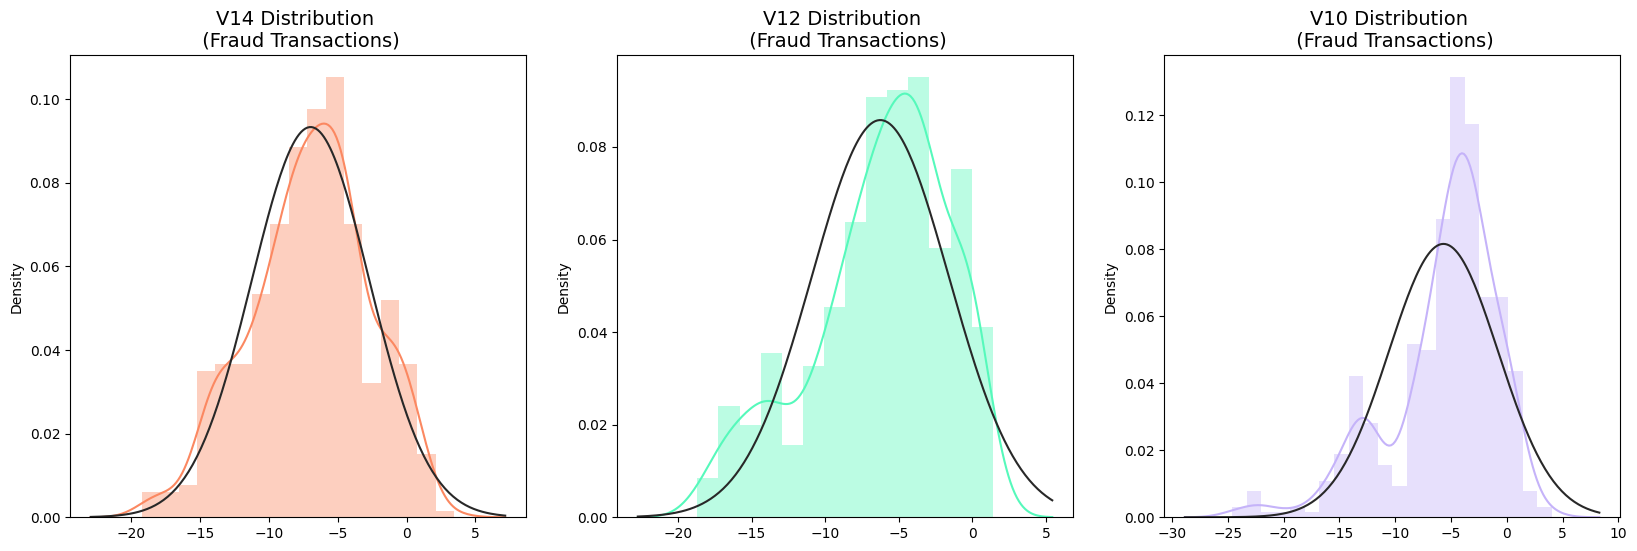

In [ ]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [ ]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75) #np.percentile -> 분위수 구하기
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25 #IQR(Interquartile Range)은 Q3와 Q1의 차이로 계산함.
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5 #1.5를 곱해서
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off #상한선과 하한선을 결정하는 컷오프 값을 계산
#하한선(v14_lower), 상한선(v14_upper)-> 이상값을 판단하는 경계
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper] #하한선보다 작거나 상한선보다 큰 값들을 이상값으로 간주
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers))) #len->이상값 개수
print('V10 outliers:{}'.format(outliers)) #실제 outlier 값

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index) #여기가 Remove 단계: V14 값이 상한선보다 크거나 하한선보다 작은 행을 제거
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.0499976898594, -18.8220867423816, -19.2143254902614, -18.4937733551053]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.5536970096458, -18.4311310279993, -18.0475965708216, -18.6837146333443]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-20.9491915543611, -22.187088

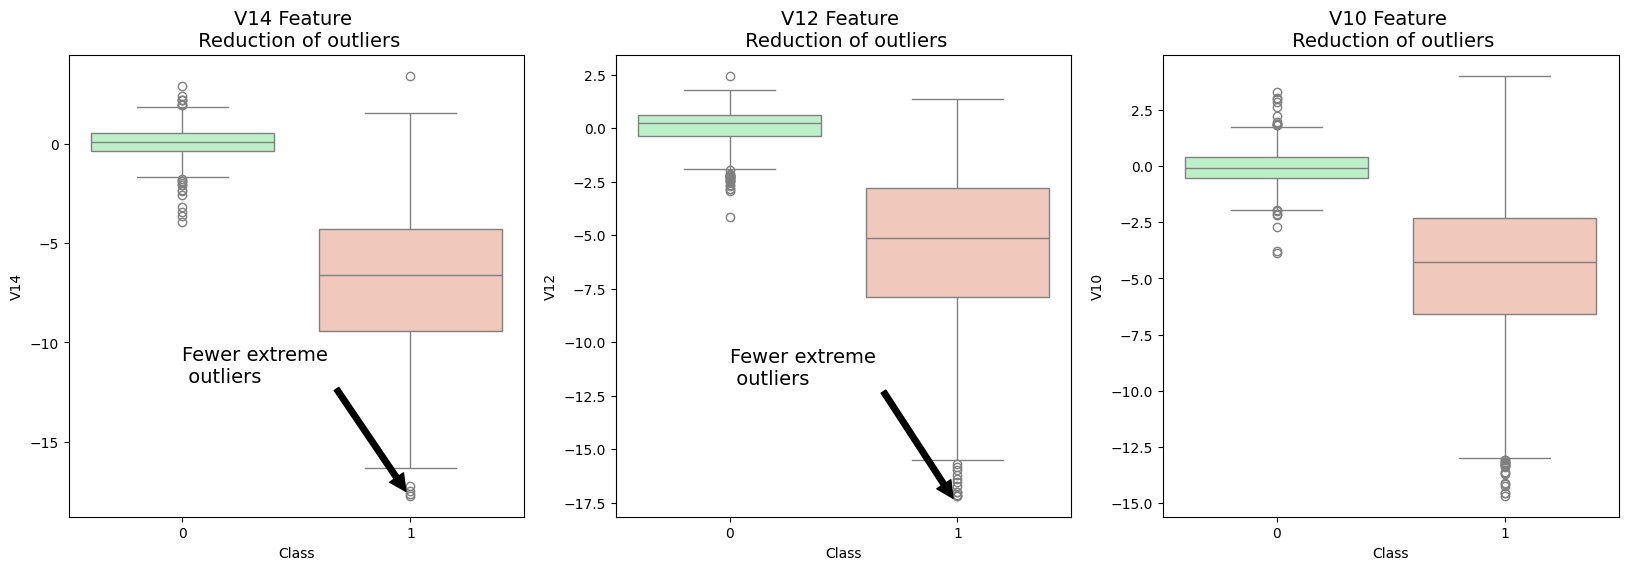

In [ ]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

## Dimensionality Reduction and Clustering:
### Clustering
* 이상치 다 떨어뜨린 undersample한 dataframe에 이제 차원 축소 적용
* 차원 축소: 시간 빠르게 하기 , feature값 줄이기 -> t-sne가 제일 나았다
* t-SNE로 확인해본 결과 분리가 잘되어- > t-SNE 시각화에서 두 클래스가 명확히 구분되면, 이는 예측 모델이 두 클래스를 잘 구분할 수 있음을 그냥 의미함.
* t-SNE에서 나온 결과를 feature에 넣고 그런 게 아님. 그냥 시각화로 확인하는 용도임
* 여전히 new_df(undersample, IQR 아웃라이어 제거) 사용
<h3>Understanding t-SNE:  </h3>
In order to understand this algorithm you have to understand the following terms: <br>
<ul>
<li> <b> Euclidean Distance </b></li>
<li> <b>Conditional Probability</b> </li>
<li><b>Normal and T-Distribution Plots</b> </li>
</ul>

**Note:** If you want a simple instructive video look at <a href="https://www.youtube.com/watch?v=NEaUSP4YerM"> StatQuest: t-SNE, Clearly Explained </a> by Joshua Starmer


<h3> Summary: </h3>
<ul>
<li>t-SNE algorithm can pretty accurately cluster the cases that were fraud and non-fraud in our dataset. </li>
<li> Although the subsample is pretty small, the t-SNE algorithm is able to detect clusters pretty accurately in every scenario (I shuffle the dataset before running t-SNE)</li>
<li> This gives us an indication that further predictive models will perform pretty well in separating fraud cases from non-fraud cases. </li>
</ul>

In [ ]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 7.7 s
PCA took 0.014 s
Truncated SVD took 0.0092 s


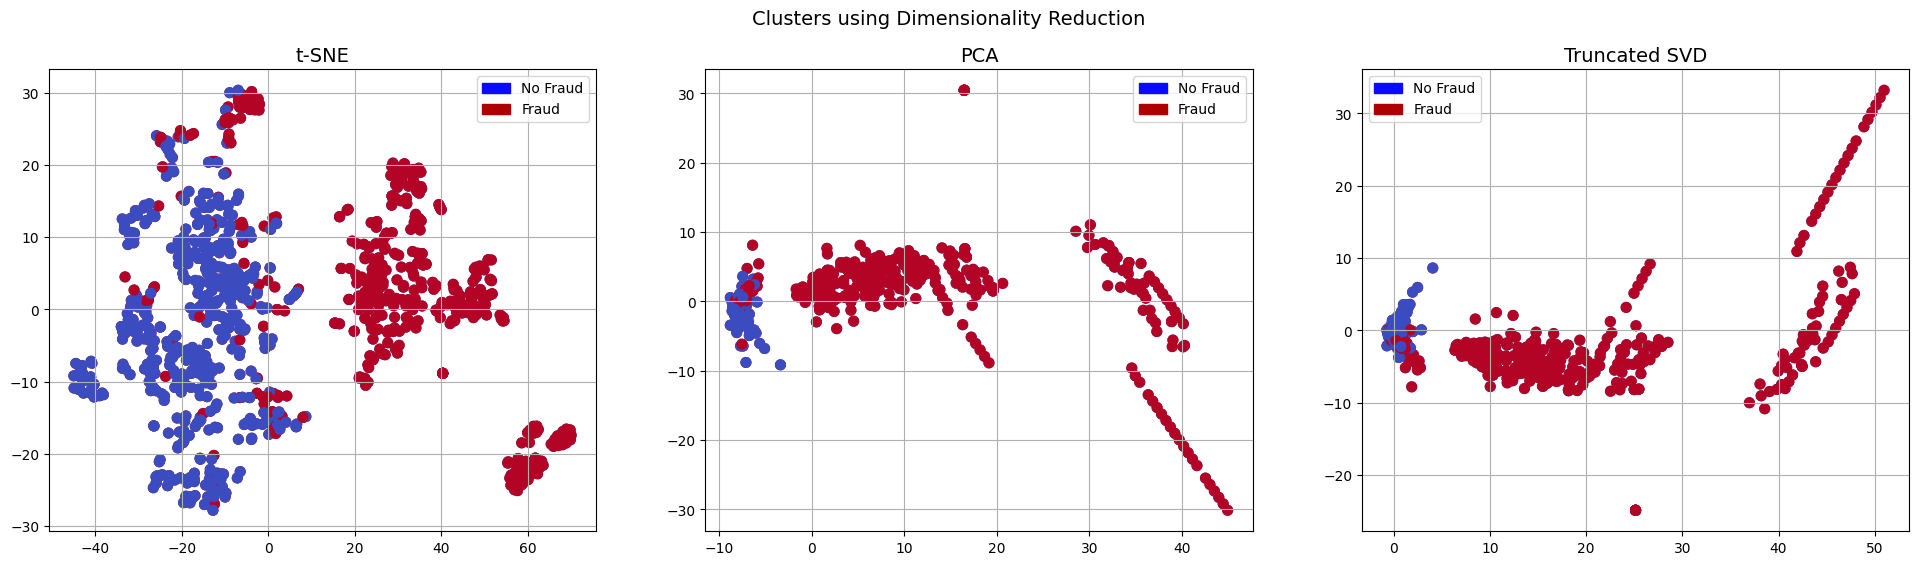

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

<h2> Classifiers (UnderSampling):  </h2>
<a id="classifiers"></a>
In this section we will train four types of classifiers and decide which classifier will be more effective in detecting <b>fraud transactions</b>.  Before we have to split our data into training and testing sets and separate the features from the labels.

## Summary:
<ul>
<li> <b> Logistic Regression </b> classifier is more accurate than the other three classifiers in most cases. (We will further analyze Logistic Regression) </li>
<li><b> GridSearchCV </b> is used to determine the paremeters that gives the best predictive score for the classifiers. </li>
<li> Logistic Regression has the best Receiving Operating Characteristic score  (ROC), meaning that LogisticRegression pretty accurately separates <b> fraud </b> and <b> non-fraud </b> transactions.</li>
</ul>

## Learning Curves:
<ul>
<li>The <b>wider the  gap</b>  between the training score and the cross validation score, the more likely your model is <b>overfitting (high variance)</b>.</li>
<li> If the score is low in both training and cross-validation sets</b> this is an indication that our model is <b>underfitting (high bias)</b></li>
<li><b> Logistic Regression Classifier</b>  shows the best score in both training and cross-validating sets.</li>
</ul>

In [ ]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [ ]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [ ]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 94.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


In [ ]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [ ]:
# Overfitting Case
#이유: X_train, y_train 얘네 다 undersampling이 들어간 new_df에서 추출한 애들임.
#under이든 over이든 sampling을 한 상태에서 cross validation을 하면 안됨.
#cross validation안에서 test/train split을 할 때 split하고 나서 그 split된 폴드의 train내에서 sampling을 적용시켜야 함. 그리고 그 폴드의 test에 validation하는 식이어야 함.

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.31%
Knears Neighbors Cross Validation Score 93.52%
Support Vector Classifier Cross Validation Score 93.52%
DecisionTree Classifier Cross Validation Score 92.59%


In [ ]:
# We will undersample during cross validating
undersample_X = df.drop('Class', axis=1) #df는 scaling(amount,time)까지 가해진 상태임. IQR 아웃라이어 제거 등 없음
undersample_y = df['Class'] #undersample안됨 그냥 이름만 저럼

#sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False) #shuffle=False로 해서 안 섞음 그냥 분할한
# 각 폴드에서 클래스 비율이 원본 데이터셋의 클래스 비율과 동일하도록 데이터를 분할
#cross validation: 클래스 비율이 일정하지 않음. 무작위로 나눔. 5-fold면 5개의 fold 중 4개를 train, 1개를 test -> 5번 반복
# stratifiedKFold: 각 fold 내의 클래스 비율이 전체 데이터의 클래스 비율과 유사하게 유지
#500개면 5 folds=>100개씩 -> 400개 train vs 100개 test을 5번 반복하는 것
for train_index, test_index in sss.split(undersample_X, undersample_y): #5개로 분할
    print("Train:", train_index, "Test:", test_index) #print된 거 보면 undersample안된 것을 볼 수 있음
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index] #걍 평가도 아니고 그냥

undersample_Xtrain = undersample_Xtrain.values #데이터프레임을 NumPy 배열로 변환
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler()
X_nearmiss, y_nearmiss = under_sampler.fit_resample(undersample_X.values, undersample_y.values)
#X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss))) #언더샘플링 후 레이블 분포를 출력 492,492
#아무튼 안씀

# Cross Validating the right way

#from sklearn.pipeline import make_pipeline
#from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
#NearMiss 언더샘플링과 로지스틱 회귀 모델을 파이프라인으로 묶음

#각 폴드에 대해 모델을 학습-> test set에 대해 예측
for train, test in sss.split(undersample_Xtrain, undersample_ytrain): #undersample이 이 상태에서 처음 가해짐.
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)
    #undersample_pipeline: NearMiss 언더샘플링과 로지스틱 회귀 모델을 결합한 파이프라인
    ## log_reg = grid_log_reg.best_estimator_
    # majority->다수 클래스의 샘플을 줄이는 방식으로 샘플링을 수행함
    # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])

    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 56953  56954  56955 ... 284804 284805 284806] Test: [    0     1     2 ... 60014 60398 61166]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56953  56954  56955 ... 119649 119897 120634]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113911 113912 113913 ... 175414 176250 178509]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170874 170875 170876 ... 227843 228355 228762]
Train: [     0      1      2 ... 227843 228355 228762] Test: [227844 227845 227846 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [ ]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve #learning_curve의 score: accuracy

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True) #sharey=True-> y축 공유하기
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes) #train_scores와 test_scores의 평균과 표준편차
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124") #fill_between->신뢰 구간을 시각화합
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # Second Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")

    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")

    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

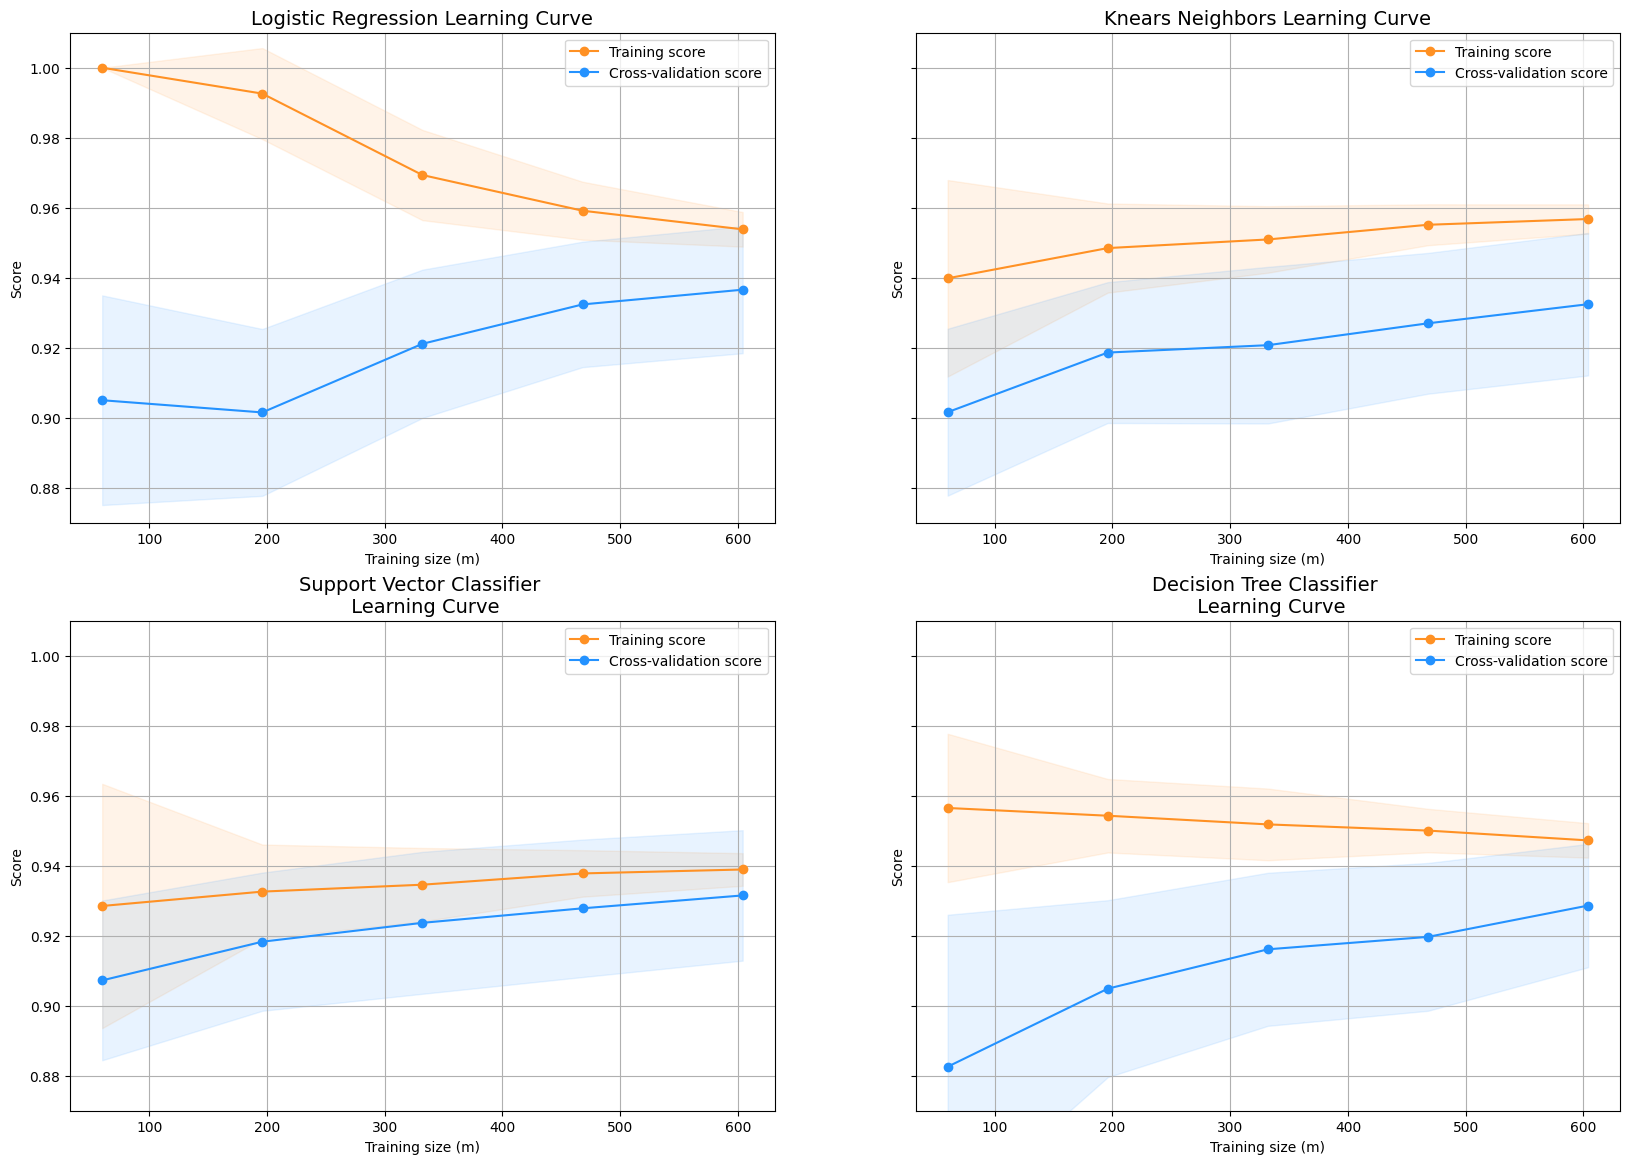

In [ ]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
#ShuffleSplit: 데이터를 여러 번 섞어서 훈련 세트와 테스트 세트로 나누는 교차 검증
#데이터를 100번 나누고 -> test_size=0.2 각 분할마다 전체데이터 20%를 test-> 재현가능하게 random state
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4) #CPU코어 4
#X, y, ylim=None, cv=None, n_jobs=1, # (0.87, 1.01): y축의 범위를 설정하여 학습 곡선이 이 범위 내에서 표시
#train_sizes=np.linspace(.1, 1.0, 5)):
#0.1부터 1.0까지의 범위에서 균등한 간격으로 5개의 값을 생성-> [0.1, 0.325, 0.55, 0.775, 1.0]
#신뢰구간으로 데이터의 변동성 또는 불확실성->특정 확률(보통 95% 신뢰수준) 내에서 실제 값이 포함될 가능성이 있는 범위
#100번 나눈 거 mean, std 구해서 train set(CV 안의), Test set(CV 안의)

#X_train, y_train을 넣은 것은 그냥 overfitting
#이미 undersampling이 가해진 상태

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")
                              #decision function-> confidence score를 반환 -> 신뢰도란?
                              #이진 분류 문제에서 모델이 특정 샘플을 양성으로 예측하면서 0.9의 신뢰도 점수를 부여했다면, 이는 모델이 해당 샘플이 양성일 가능성이 90%라고 판단한 것
                              #의사는 특정 확률(임계값) 이상일 때만 환자를 양성(질병 있음)으로 진단할 수 있음
                             #ROC:다양한 임계값(0.9, 0.8, 0.7 등)에서 각 임계값에서 진단의 정확도(TPR과 FPR)를 평가->이를 면적으로 나타낸 게 AUC


knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [ ]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9699341828875507
KNears Neighbors:  0.9340638566027166
Support Vector Classifier:  0.9799257807029828
Decision Tree Classifier:  0.9249964990897632


In [ ]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
#roc_curve(y_train, y_score)->Target scores, which can be probability estimates, confidence values, or non-thresholded measure of decisions.
#임계값: 신뢰도 점수를 기준으로 양성/음성 클래스를 나누는 기준.
#신뢰도 점수: 모델이 각 샘플에 대해 예측한 확률 값
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)

#log_reg_pred: Confidence scores from the logistic regression model.
#knears_pred: Predicted class labels from the k-nearest neighbors model.
#svc_pred: Confidence scores from the support vector classifier.
#tree_pred: Predicted class labels from the decision tree classifier.

#Scores: ROC curve needs scores to vary the threshold, but predicted labels are binary and do not provide a natural way to vary the threshold.
#For classifiers like k-nearest neighbors and decision trees, use the predict_proba method if available to get probability estimates for each class.
#These probabilities can be used as scores for the ROC curve.

def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()
#True Positive Rate (TPR)**과 **False Positive Rate (FPR)**의 관계
#AUC가 1에 가까울수록, 모델이 양성과 음성을 잘 구분할 수 있음
#반대로, AUC가 0.5에 가까울수록 모델의 분류 능력이 무작위 추측과 비슷하다는 것

NameError: name 'roc_curve' is not defined

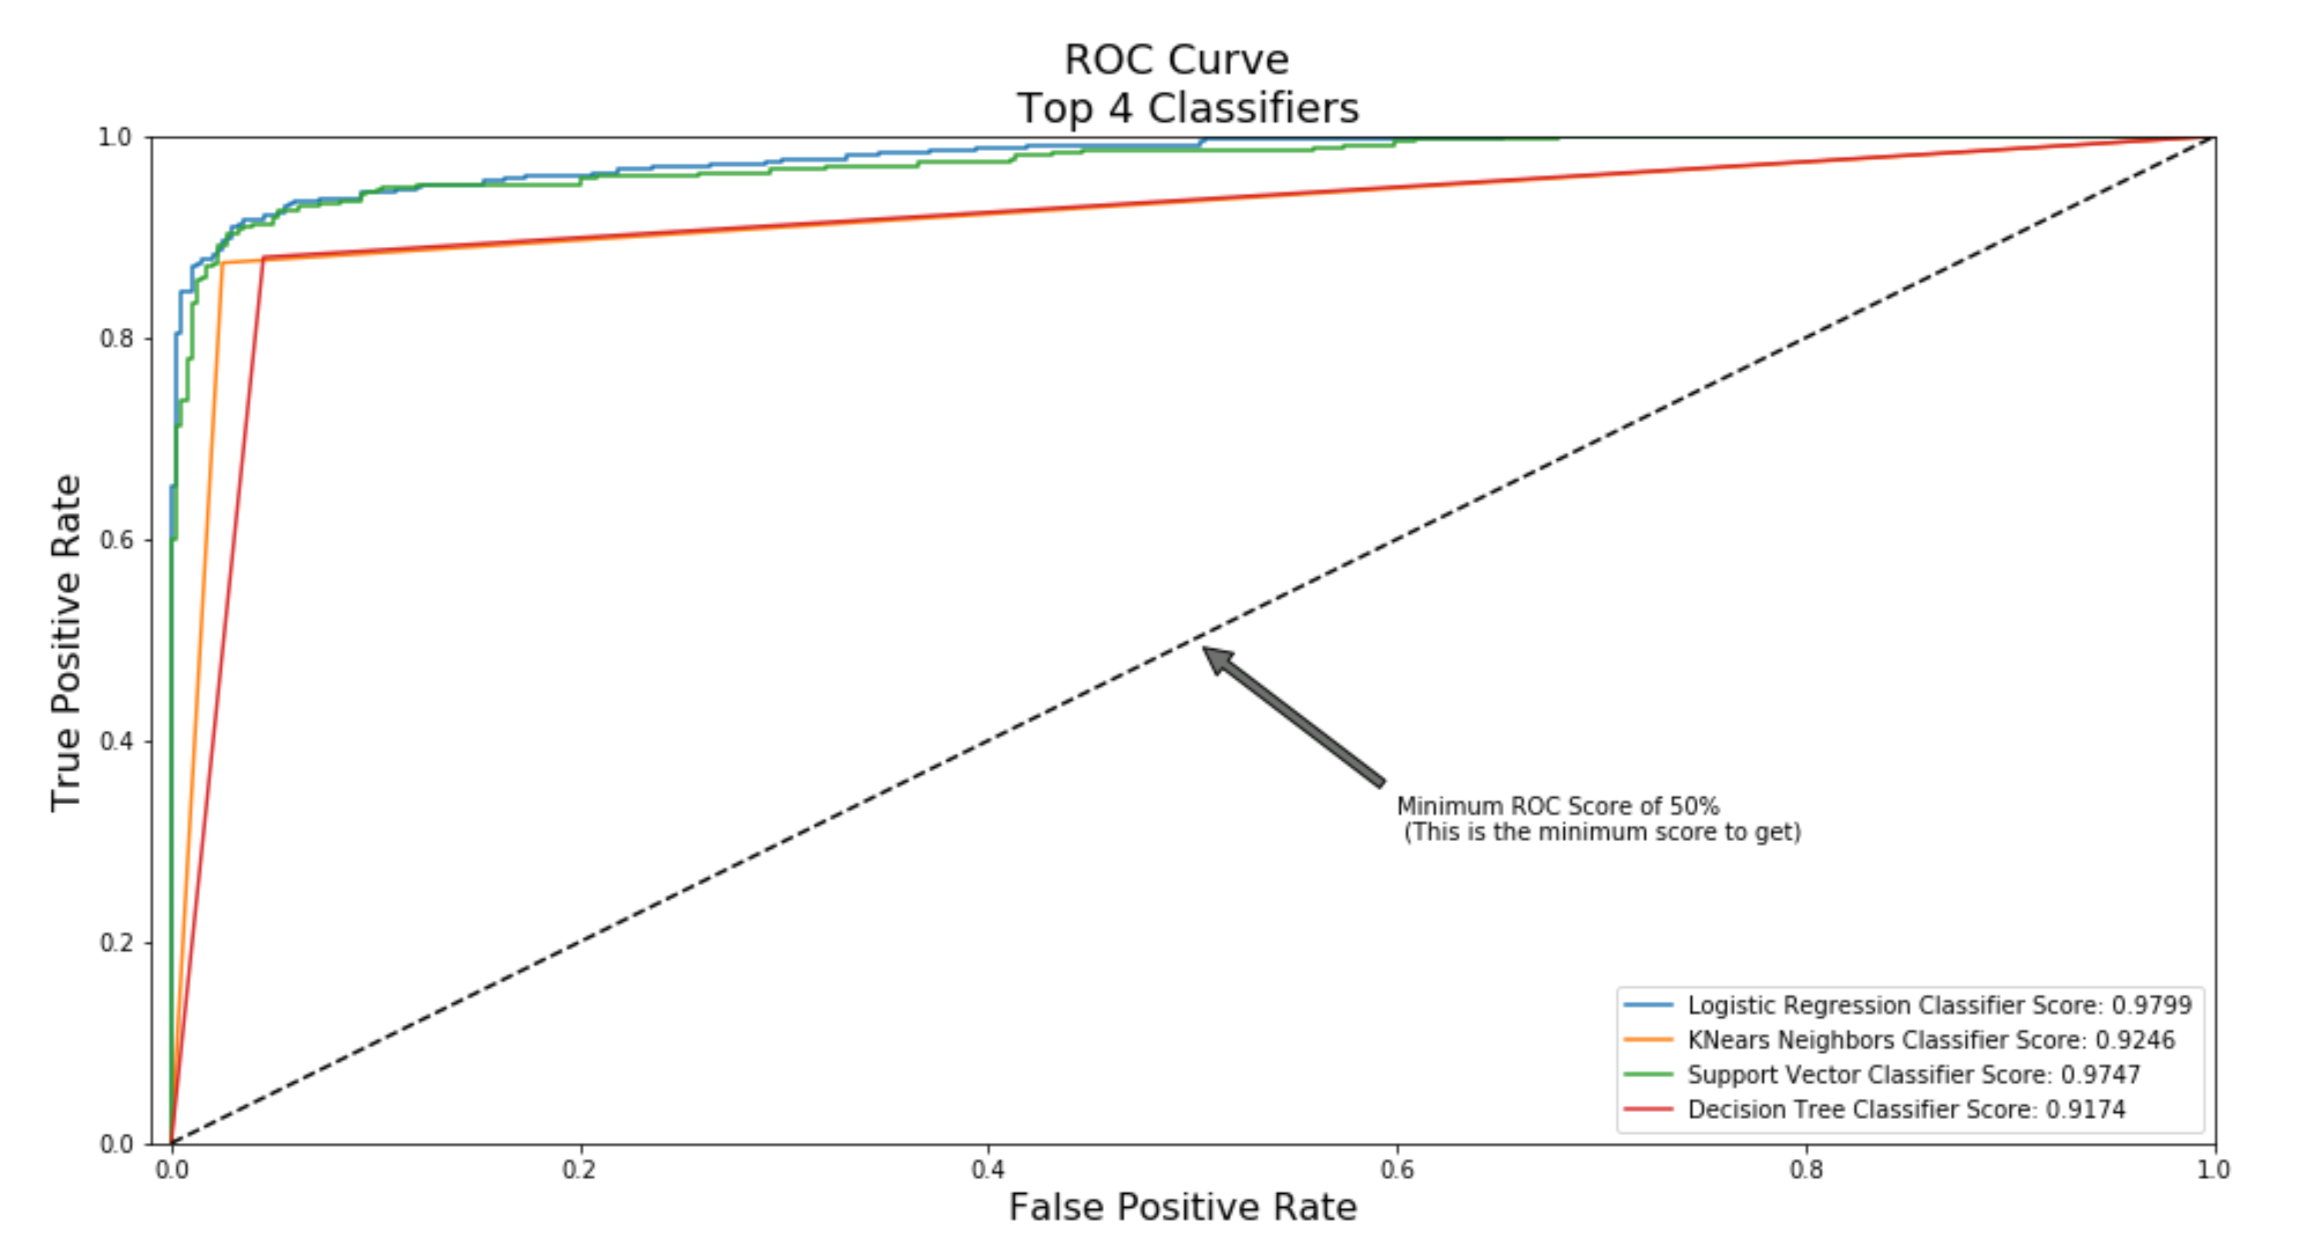

## A Deeper Look into LogisticRegression:
<a id="logistic"></a>
In this section we will ive a deeper look into the <b> logistic regression classifier</b>.


### Terms:
<ul>
<li><b>True Positives:</b> Correctly Classified Fraud Transactions </li>
<li><b>False Positives:</b> Incorrectly Classified Fraud Transactions</li>
<li> <b>True Negative:</b> Correctly Classified Non-Fraud Transactions</li>
<li> <b>False Negative:</b> Incorrectly Classified Non-Fraud Transactions</li>
<li><b>Precision: </b>  True Positives/(True Positives + False Positives)  </li>
<li><b> Recall: </b> True Positives/(True Positives + False Negatives)   </li>
<li> Precision as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect.</li>
<li><b>Precision/Recall Tradeoff: </b> The more precise (selective) our model is, the less cases it will detect. Example: Assuming that our model has a precision of 95%, Let's say there are only 5 fraud cases in which the model is 95% precise or more that these are fraud cases. Then let's say there are 5 more cases that our model considers 90% to be a fraud case, if we lower the precision there are more cases that our model will be able to detect. </li>
</ul>

### Summary:
<ul>
<li> <b>Precision starts to descend</b> between 0.90 and 0.92 nevertheless, our precision score is still pretty high and still we have a descent recall score. </li>

</ul>

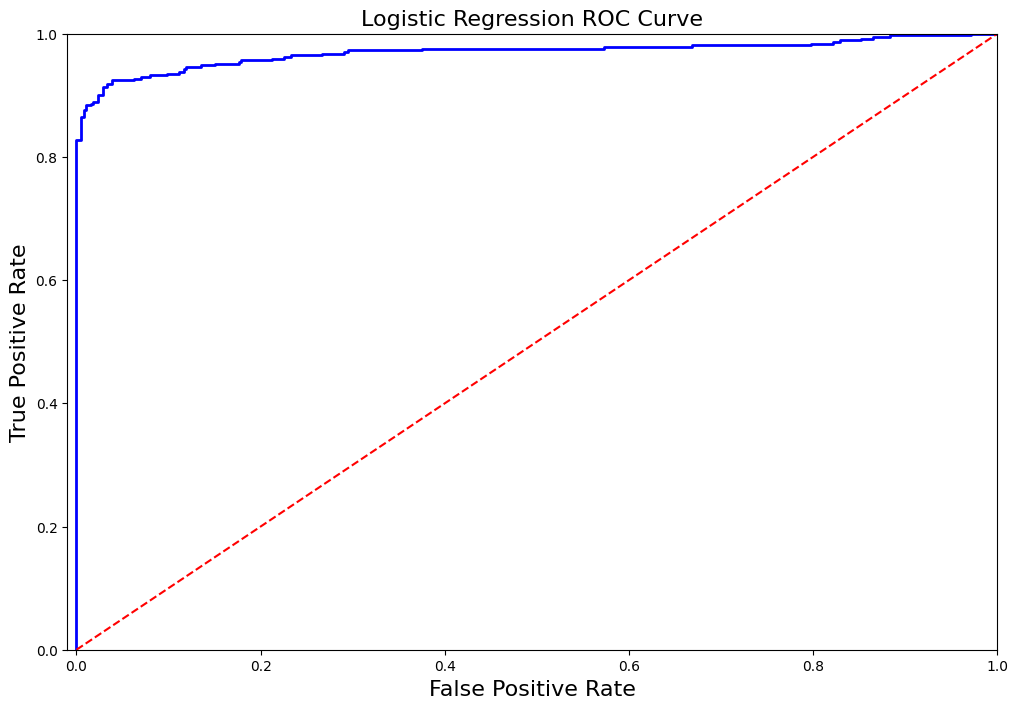

In [ ]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])


logistic_roc_curve(log_fpr, log_tpr)
plt.show()
#TPR = 1 (100%): 모든 실제 양성 샘플을 올바르게 예측
#FPR = 0 (0%): 모든 실제 음성 샘플을 올바르게 예측

#ROC 곡선에서 (0, 1) 좌표에 가장 가까운 점을 찾음( TPR이 최대이면서 FPR이 최소인 지점)
#ROC 곡선의 좌상단에서 가장 가까운 점

#TPR−FPR을 최대화

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

## Turn the values into an array for feeding the classification algorithms.애초에 다 undersample된 것들인데
#X_train = X_train.values
#X_test = X_test.values
#y_train = y_train.values
#y_test = y_test.values

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like -> undersample이 안됨
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)


"""
#각 폴드에 대해 모델을 학습-> test set에 대해 예측
for train, test in sss.split(undersample_Xtrain, undersample_ytrain): #undersample이 이 상태에서 처음 가해짐.
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)
    #undersample_pipeline: NearMiss 언더샘플링과 로지스틱 회귀 모델을 결합한 파이프라인
    ## log_reg = grid_log_reg.best_estimator_
    # majority->다수 클래스의 샘플을 줄이는 방식으로 샘플링을 수행함
    # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])

    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction)) """

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.95
Precision Score: 0.65
F1 Score: 0.77
Accuracy Score: 0.73
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.45
Precision Score: 0.00
Recall Score: 0.53
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
undersample_y_score = log_reg.decision_function(original_Xtest)
#log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,method="decision_function")
#he decision_function method is used by some classifiers to return confidence scores for each class,
#which can then be used to make predictions or further analyze the model's performance.
#Specifically, it gives a measure of the distance of the samples from the decision boundary.

In [ ]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.01


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.01')

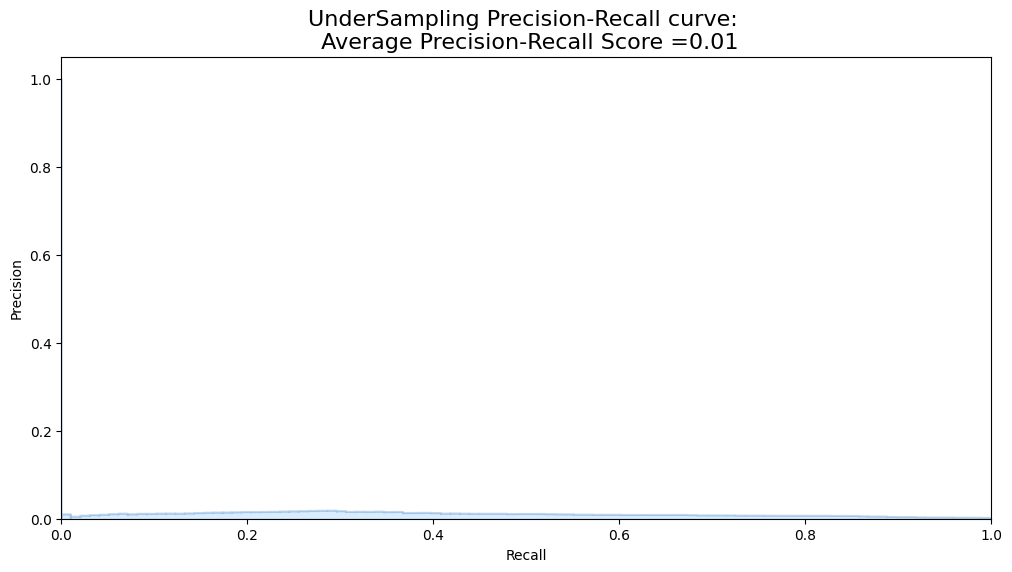

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score) #undersample

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)
#Precision과 Recall 사이의 균형을 나타내는 지표로 F1 Score: Precision과 Recall의 조화 평균(Harmonic Mean)

### SMOTE Technique (Over-Sampling):
<a id="smote"></a>
<b>SMOTE</b> : Synthetic Minority Over-sampling Technique.  
* another alternative for solving the "class imbalance problems"
* SMOTE = oversampling
* new synthetic point를 생성 -> class간의 balance를 맞춤
* RandomUndersampler는 뭔가를 새롭게 만들지는 않으니까 다른점임. (synthetic create X)
. <br><br>


<b> Understanding SMOTE: </b>
<ul>
<li> <b> Solving the Class Imbalance: </b> synthetic point를 minority class에서 만듦 -> reach an equal balance between the minority and majority class. </li>
<li><b>Synthetic point 의 위치: </b>  minority class의 closest neighbors 간의 거리를 구함. 이 거리 사이에서 synthetic point를 생성 </li>
<li> <b>Final Effect:  </b> information loss 보다는 많은 info가 남아있음 -> Random undersampling과는 다르게 아무것도 삭제하지 않았기 때문 </li>
<li><b> Accuracy || Time Tradeoff: </b> Random undersampling보다 accuracy가 높지만, 시간이 더 걸림 (rows가 더 많기 때문...) </li>

</ul>

### Cross Validation Overfitting Mistake:
미안합니다. 제작자가 이런 실수를 했는데 여러분도 하실 수 있는 실수이니 일단 공유해드리려고요..

## Overfitting during Cross Validation:  
* Cross validation 전에 undersample, oversample하지 마라.
* 이유: validation set에 "data leakage"
* 결과: precision, recall 이 좋은 줄 알았는데 알고보니 overfitting이었더라...

### The Wrong Way:
<img src="https://www.marcoaltini.com/uploads/1/3/2/3/13234002/2639934.jpg?401"><br>

* 5 batch로 split -> 4/5가 training, 1/5가 validation
* test set은 touch되면 안됨
* cross validation 도중에 synthetic data creation을 해야하지 before은 안됨

### The Right Way:
<img src="https://www.marcoaltini.com/uploads/1/3/2/3/13234002/9101820.jpg?372"> <br>

* cross validation 전에 SMOTE를 하면 안됨.
  * oversample을 한 상태에서 validation set을 정해버리면 training set에 validation set과 동일한 데이터가 있을 수 있음 => overfitting이 됨.
  * 노란색으로 노란색을 예측하게 됨
* cross validation 도중에 SMOTE를 해야 함.
  * cross validation을 해서 만들어진 해당 iteration의 validation, train set이 있고 그 때 train set에서 oversample을 하는 것임.
  * 주황색으로 노란색을 예측하게 됨
  * synthetic data는 training data에서만 만들어져야 하고, validation set에 영향을 주면 안됨.




**References**:
<ul>
<li><a src="https://www.marcoaltini.com/blog/dealing-with-imbalanced-data-undersampling-oversampling-and-proper-cross-validation">
DEALING WITH IMBALANCED DATA: UNDERSAMPLING, OVERSAMPLING AND PROPER CROSS-VALIDATION </a></li>

<li> <a src="http://rikunert.com/SMOTE_explained "> SMOTE explained for noobs  </a></li>
<li> <a src="https://www.youtube.com/watch?v=DQC_YE3I5ig&t=794s"> Machine Learning - Over-& Undersampling - Python/ Scikit/ Scikit-Imblearn </a></li>
</ul>

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()




rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
#모델 복잡도에 대한 일종의 패널티
#L1,L2 정규화 -> cost function에 영향을 미치는 weight 값 조정
#L1 Norm 은 벡터 p, q 의 각 원소들의 차이의 절대값의 합
#L2 Norm 은 벡터 p, q 의 유클리디안 거리(직선 거리)
#L1을 적용하면 vector들이 sparse vector가 되는 경향이 있다. 즉, 작은 weight 값이 0이 된다.
#따라서 weight 수를 줄이고 small set을 만들고 싶으면 L1을 사용할 수 있다.
# L2는 모든 가중치를 균등하고 작게 유지하려고 하므로, 일반적으로 학습 시 더 좋은 결과를 만든다.

#만약 (1,0) vector가 있을 때, L1으로 계산하면 |1|+|0|=1이 되고 L2로 계산하여도 1+0=1이 된다. 반면 (0.5,0.5) vector가 있을 때,
#L1으로 계산하면 |0.5|+|0.5|=1이 되지만 L2로 계산하면 0.52+0.52=0.25+0.25=0.5가 된다.
#값이 균등하게 작을 때에는 L2의 값이 더 작아지게 된다. 따라서 Error에 더 작은 penalty를 주게 된다.
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])

    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))

print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9702783395229113
precision: 0.06434263968473802
recall: 0.9111976630963973
f1: 0.11901054231104076
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest) #logistic regression
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.11      0.86      0.19        98

    accuracy                           0.99     56961
   macro avg       0.55      0.92      0.59     56961
weighted avg       1.00      0.99      0.99     56961



In [ ]:
y_score = best_est.decision_function(original_Xtest)

In [ ]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.74


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.74')

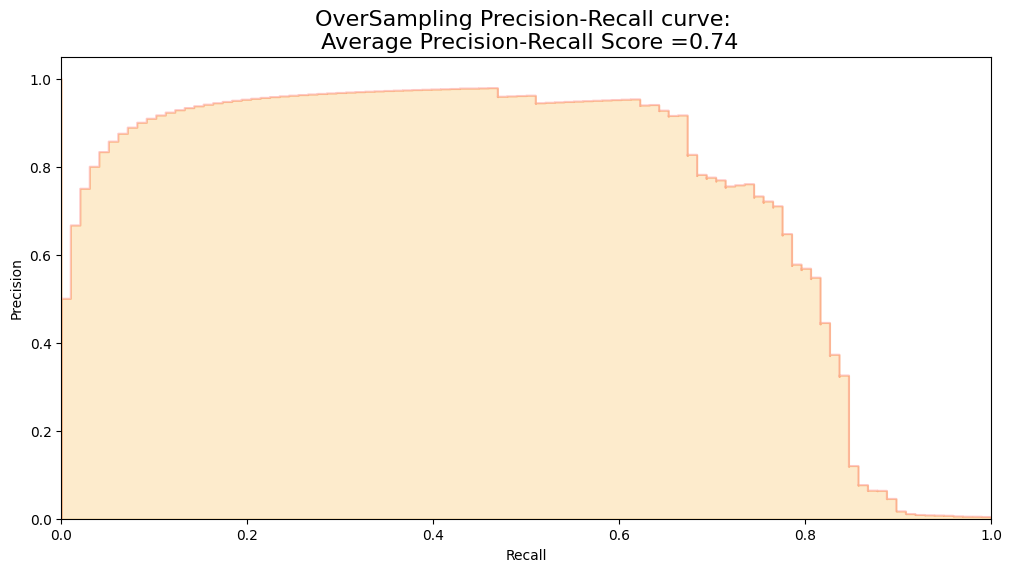

In [ ]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [ ]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(random_state=42, sampling_strategy='minority')
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [ ]:
# We Improve the score by 2% points approximately
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :13.123790740966797 sec


# Test Data with Logistic Regression:
<a id="testing_logistic"></a>
## Confusion Matrix:
**Positive/Negative:** Type of Class (label) ["No", "Yes"]
**True/False:** Correctly or Incorrectly classified by the model.<br><br>

**True Negatives (Top-Left Square):** This is the number of **correctly** classifications of the "No" (No Fraud Detected) class. <br><br>

**False Negatives (Top-Right Square):** This is the number of **incorrectly** classifications of the "No"(No Fraud Detected) class. <br><br>

**False Positives (Bottom-Left Square):** This is the number of **incorrectly** classifications of the "Yes" (Fraud Detected) class <br><br>

**True Positives (Bottom-Right Square):** This is the number of **correctly** classifications of the "Yes" (Fraud Detected) class.


### Summary:
<ul>
<li> <b>Random UnderSampling:</b> We will evaluate the final performance of the classification models in the random undersampling subset. <b>Keep in mind that this is not the data from the original dataframe. </b> </li>
<li> <b>Classification Models: </b> The models that performed the best were <b>logistic regression </b> and <b>support vector classifier (SVM)</b>  </li>
</ul>

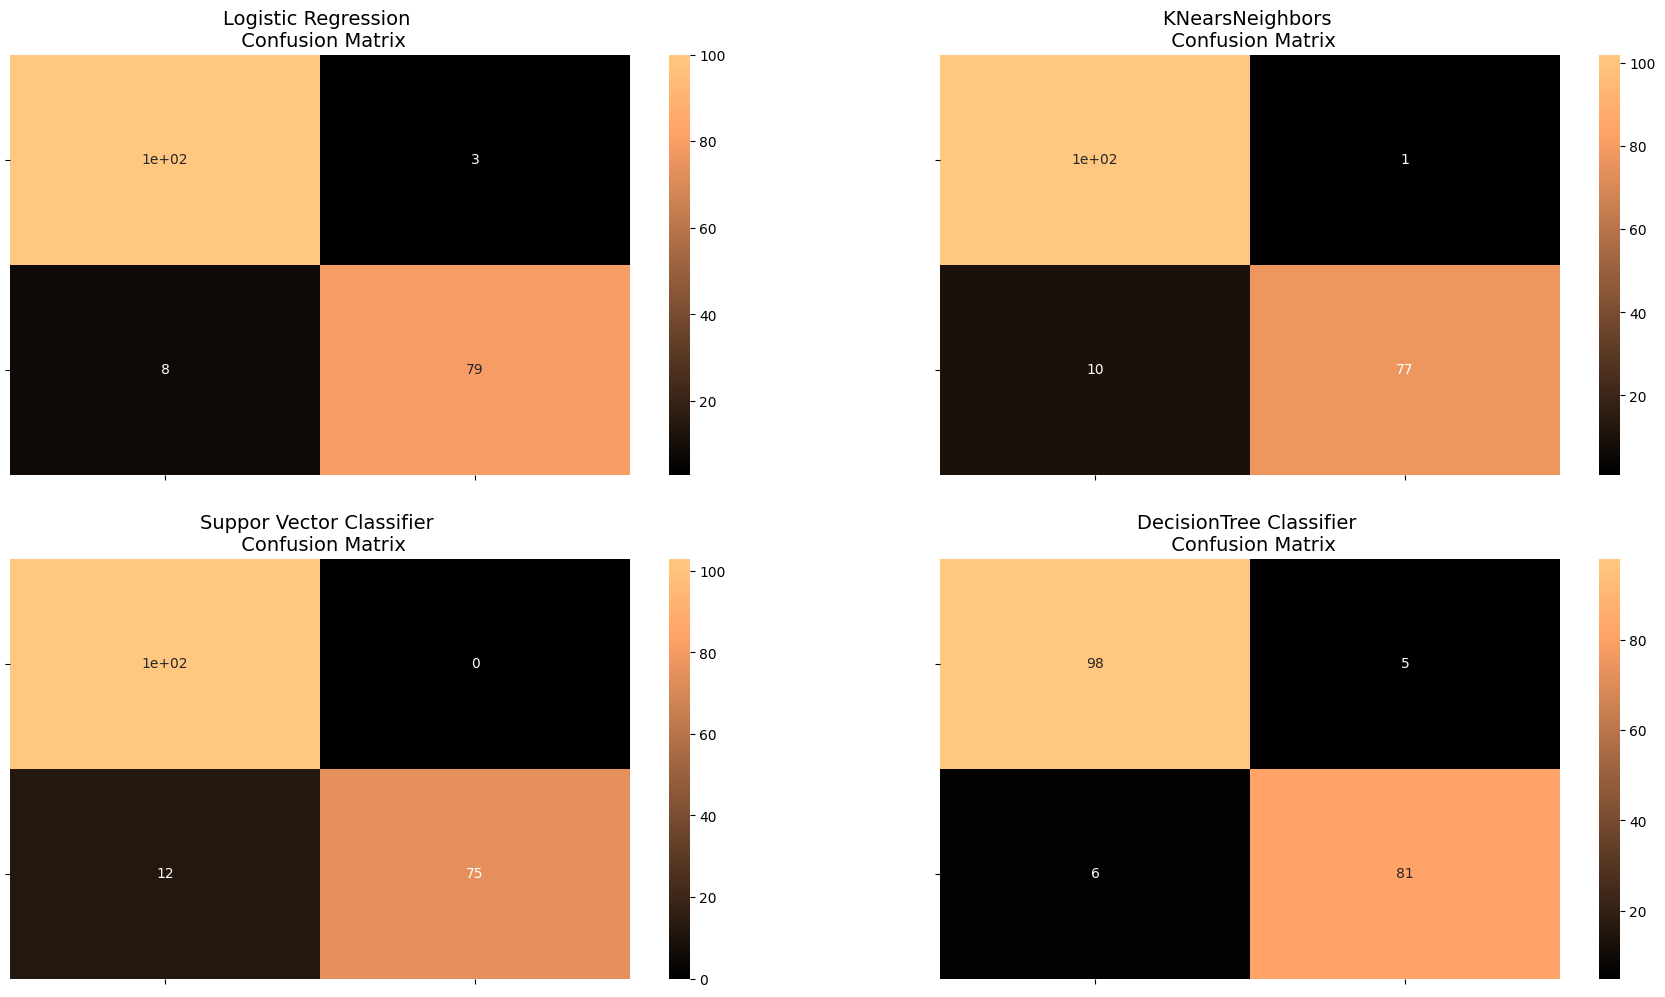

In [ ]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [ ]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       103
           1       0.96      0.91      0.93        87

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       103
           1       0.99      0.89      0.93        87

    accuracy                           0.94       190
   macro avg       0.95      0.94      0.94       190
weighted avg       0.95      0.94      0.94       190

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       103
           1       1.00      0.86      0.93        87

    accuracy                           0.94       190
   macro avg       0.95      0.93      0.94       190
weighted

In [ ]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading!
final_df

,Technique,Score
0,Random UnderSampling,0.942105
1,Oversampling (SMOTE),0.987658


## Neural Networks Testing Random UnderSampling Data vs OverSampling (SMOTE):
<a id="neural_networks"></a>
In this section we will implement a simple Neural Network (with one hidden layer) in order to see  which of the two logistic regressions models we implemented in the (undersample or oversample(SMOTE)) has a better accuracy for detecting fraud and non-fraud transactions. <br><br>

### Our Main Goal:
Our main goal is to explore how our simple neural network behaves in both the random undersample and oversample dataframes and see whether they can predict accuractely both non-fraud and fraud cases. Why not only focus on fraud? Imagine you were a cardholder and after you purchased an item your card gets blocked because the bank's algorithm thought your purchase was a fraud. That's why we shouldn't emphasize only in detecting fraud cases but we should also emphasize correctly categorizing non-fraud transactions.


### The Confusion Matrix:
Here is again, how the confusion matrix works:
<ul>
<li><b>Upper Left Square: </b> The amount of <b>correctly</b> classified by our model of  no fraud transactions. </li>
<li> <b>Upper Right Square:</b> The amount of  <b>incorrectly </b> classified transactions as fraud cases, but the actual label is <b> no fraud </b>. </li>
<li><b>Lower Left Square:</b> The amount of <b> incorrectly </b> classified transactions as no fraud cases, but the actual label is <b>fraud </b>. </li>
<li><b> Lower Right Square:</b> The amount of  <b>correctly</b> classified by our model of fraud transactions. </li>
</ul>

### Summary (Keras || Random UnderSampling):
<ul>
<li><b>Dataset: </b> In this final phase of testing we will fit this model in both the <b>random undersampled subset</b>  and <b> oversampled dataset (SMOTE) </b>in order to predict the final result using the <b>original dataframe testing data.</b> </li>
<li>  <b>Neural Network Structure: </b> As stated previously, this will be a simple model composed of one input layer (where the number of nodes equals the number of features) plus bias node, one hidden layer with 32 nodes and one output node composed of two possible results 0 or 1 (No fraud or fraud). </li>
<li> <b>Other characteristics:</b> The learning rate will be 0.001, the optimizer we will use is the AdamOptimizer, the activation function that is used in this scenario is "Relu" and for the final outputs we will use sparse categorical cross entropy, which gives the probability whether an instance case is no fraud or fraud (The prediction will pick the highest probability between the two.) </li>
</ul>


In [ ]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [ ]:
undersample_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 32)                992       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1988 (7.77 KB)
Trainable params: 1988 (7.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
undersample_model.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
25/25 - 3s - loss: 0.0710 - accuracy: 0.9752 - val_loss: 0.1666 - val_accuracy: 0.9474 - 3s/epoch - 109ms/step
Epoch 2/20
25/25 - 0s - loss: 0.0650 - accuracy: 0.9752 - val_loss: 0.1550 - val_accuracy: 0.9539 - 149ms/epoch - 6ms/step
Epoch 3/20
25/25 - 0s - loss: 0.0606 - accuracy: 0.9752 - val_loss: 0.1624 - val_accuracy: 0.9474 - 139ms/epoch - 6ms/step
Epoch 4/20
25/25 - 0s - loss: 0.0557 - accuracy: 0.9801 - val_loss: 0.1692 - val_accuracy: 0.9539 - 174ms/epoch - 7ms/step
Epoch 5/20
25/25 - 0s - loss: 0.0522 - accuracy: 0.9818 - val_loss: 0.2056 - val_accuracy: 0.9474 - 187ms/epoch - 7ms/step
Epoch 6/20
25/25 - 0s - loss: 0.0496 - accuracy: 0.9834 - val_loss: 0.1769 - val_accuracy: 0.9474 - 136ms/epoch - 5ms/step
Epoch 7/20
25/25 - 0s - loss: 0.0470 - accuracy: 0.9818 - val_loss: 0.1919 - val_accuracy: 0.9474 - 136ms/epoch - 5ms/step
Epoch 8/20
25/25 - 0s - loss: 0.0439 - accuracy: 0.9868 - val_loss: 0.1764 - val_accuracy: 0.9539 - 142ms/epoch - 6ms/step
Epoch 9/20
25/25 

In [ ]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [ ]:
undersample_fraud_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0).argmax(axis=-1)

In [ ]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[53697  3166]
 [    2    96]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


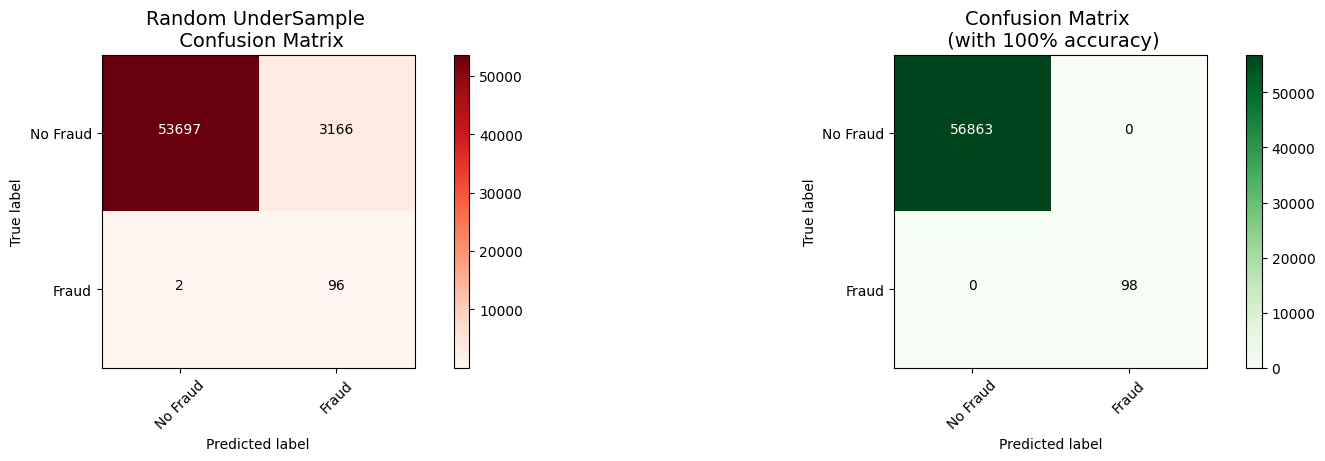

In [ ]:
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

### Keras || OverSampling (SMOTE):


In [ ]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [ ]:
oversample_model.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
1214/1214 - 10s - loss: 0.0597 - accuracy: 0.9783 - val_loss: 0.0342 - val_accuracy: 0.9944 - 10s/epoch - 8ms/step
Epoch 2/20
1214/1214 - 6s - loss: 0.0111 - accuracy: 0.9978 - val_loss: 0.0096 - val_accuracy: 1.0000 - 6s/epoch - 5ms/step
Epoch 3/20
1214/1214 - 4s - loss: 0.0061 - accuracy: 0.9988 - val_loss: 0.0037 - val_accuracy: 1.0000 - 4s/epoch - 3ms/step
Epoch 4/20
1214/1214 - 3s - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.0058 - val_accuracy: 0.9998 - 3s/epoch - 2ms/step
Epoch 5/20
1214/1214 - 3s - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0067 - val_accuracy: 0.9991 - 3s/epoch - 2ms/step
Epoch 6/20
1214/1214 - 4s - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0016 - val_accuracy: 1.0000 - 4s/epoch - 3ms/step
Epoch 7/20
1214/1214 - 4s - loss: 0.0025 - accuracy: 0.9995 - val_loss: 3.8623e-04 - val_accuracy: 1.0000 - 4s/epoch - 3ms/step
Epoch 8/20
1214/1214 - 3s - loss: 0.0021 - accuracy: 0.9996 - val_loss: 9.9084e-04 - val_accuracy: 1.0000 - 3s/epoch - 2ms/ste

In [ ]:
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [ ]:
oversample_fraud_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0).argmax(axis=-1)

Confusion matrix, without normalization
[[56855     8]
 [   32    66]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


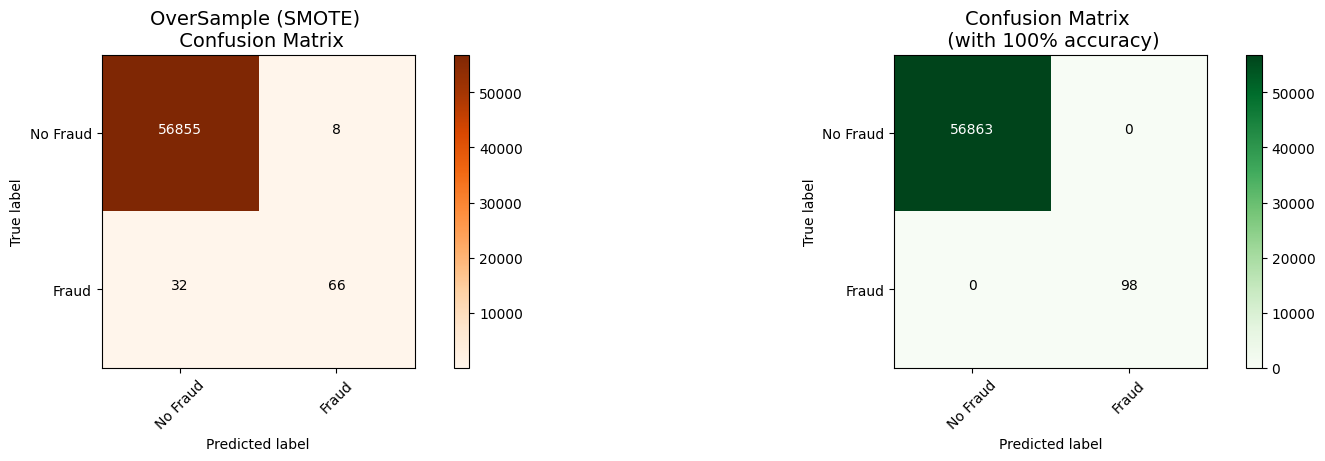

In [ ]:
oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

### Conclusion:
* SMOTE가 낫다 (more no fraud than fraud transactions).
* 신경망: sometimes the neural network on the oversampled dataset predicts less correct fraud transactions than our model using the undersample dataset.

* Outlier가 차이에 영향을 줬을 수도: However, remember that the removal of outliers was implemented only on the random undersample dataset and not on the oversampled one.

* Undersample의 장점: Also, in our undersample data our model is unable to detect for a large number of cases non fraud transactions correctly and instead, misclassifies those non fraud transactions as fraud cases.

*현실성 고려: Imagine that people that were making regular purchases got their card blocked due to the reason that our model classified that transaction as a fraud transaction, this will be a huge disadvantage for the financial institution.
* The number of customer complaints and customer disatisfaction will increase.  * The next step of this analysis will be to do an outlier removal on our oversample dataset and see if our accuracy in the test set improves. <br><br>

**Note:**
* 항상 결과 바뀜, random state 검증 X
* One last thing, predictions and accuracies may be subjected to change since I implemented data shuffling on both types of dataframes.
* The main thing is to see if our models are able to correctly classify no fraud and fraud transactions.


In [ ]:
new_df['Class'].value_counts()

Class
0    489
1    457
Name: count, dtype: int64

cluster
-1    940
 0      6
Name: count, dtype: int64


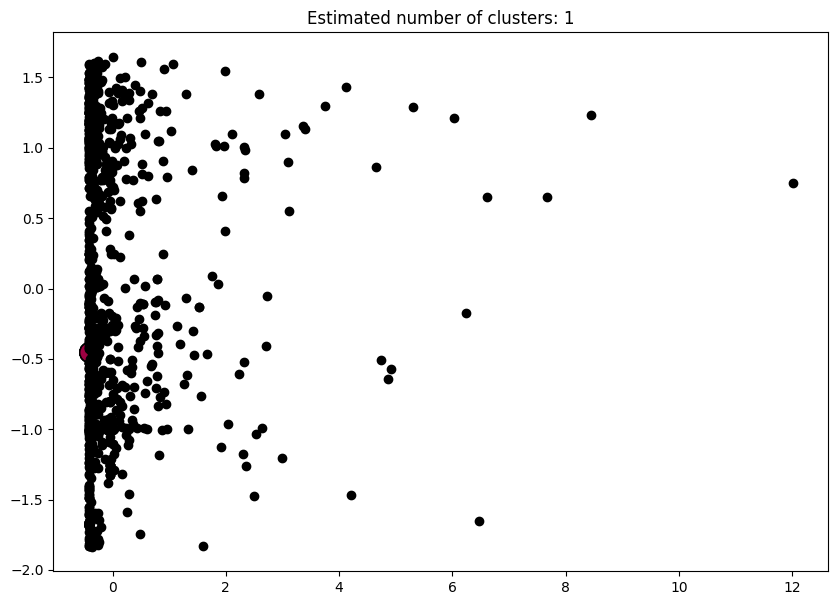

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

def DB_outliers(df):
    # Standardize features by removing the mean and scaling to unit variance
    X_a = StandardScaler().fit_transform(df)

    # Apply DBSCAN
    outlier_detection = DBSCAN(eps=0.5, metric='euclidean', min_samples=5)
    clusters = outlier_detection.fit_predict(X_a)

    # Create a mask for core samples
    core_samples_mask = np.zeros_like(outlier_detection.labels_, dtype=bool)
    core_samples_mask[outlier_detection.core_sample_indices_] = True
    labels = outlier_detection.labels_

    # Create a DataFrame with the cluster labels
    data = pd.DataFrame()
    data['cluster'] = clusters
    print(data['cluster'].value_counts().sort_values(ascending=False))

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    unique_labels = set(labels)

    # Plot the results
    plt.figure(figsize=(10, 7))
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X_a[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X_a[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title(f'Estimated number of clusters: {n_clusters_}')
    plt.show()

DB_outliers(X)

In [ ]:
X

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
180558,0.051701,0.468779,-1.155315,1.080884,0.053889,-0.535258,1.891685,-0.828109,1.271601,-0.318771,...,-0.580586,0.188893,-0.118671,0.106012,-0.722072,0.486358,1.108206,0.761403,-0.032086,-0.067276
57615,-0.296793,-0.431279,-1.232804,2.244119,-1.703826,1.492536,-1.192985,-1.686110,-1.864612,0.856122,...,-0.095807,0.207889,0.560475,0.165682,-0.013754,0.474935,-0.218725,0.302809,0.466031,0.250134
194779,3.185915,0.541137,1.571674,-0.537408,-2.125915,1.433633,0.275206,-1.156083,0.966482,-0.400964,...,-0.643917,0.110537,0.272665,0.222832,-0.121847,1.048864,0.279050,-0.557586,-0.091494,-0.014416
123270,-0.293440,-0.091930,1.082566,1.094862,-1.367020,2.012554,0.708142,-0.807712,0.151952,0.158353,...,-0.880812,-0.135789,-0.325284,-0.734344,-0.106725,-0.224999,0.569167,-0.335033,0.089140,0.112337
208654,-0.080626,0.617030,-0.097784,1.388260,-0.416675,1.135805,1.391569,-0.867298,1.599147,-0.396742,...,0.416751,0.161102,-0.004344,0.404255,-0.239631,0.950218,-0.052499,-0.456333,0.280566,0.063327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10630,10.401174,-0.785418,-5.187878,6.967709,-13.510931,8.617895,-11.214422,0.672248,-9.462533,5.328704,...,2.382808,-0.623737,2.086083,0.760190,0.716806,-0.646743,-1.617043,0.172347,0.626647,-0.169726
192529,-0.293440,0.529247,-1.396204,2.618584,-6.036770,3.552454,1.030091,-2.950358,-1.528506,0.189319,...,0.170144,0.031795,0.143177,-0.390176,0.356029,-0.762352,0.096510,-0.487861,0.062655,-0.240732
29823,2.235730,-0.576217,1.118470,-1.620604,0.622265,-1.261634,-1.983870,-0.662344,-0.999085,-0.046142,...,-0.075717,-0.019589,-0.209499,-0.706629,0.051969,0.479694,-0.011076,-0.456142,0.003048,0.049694
106998,-0.254454,-0.169915,0.315642,1.636778,-1.519650,4.028571,-1.186794,-0.789813,-2.279807,0.472988,...,-0.136117,0.388885,0.345921,-0.108002,-0.165442,0.279895,0.808783,0.117363,0.589595,0.309064


In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd
def Iso_outliers(df):
    iso = IsolationForest( n_estimators=100, max_samples='auto', contamination='auto', max_features=1, bootstrap=False, n_jobs=None, random_state=1, verbose=0, warm_start=False)
    preds = iso.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = preds
    print(data['cluster'].value_counts().sort_values(ascending=False))
Iso_outliers(X)

cluster
 1    23619
-1     4761
Name: count, dtype: int64


cluster
 1    826
-1    120
Name: count, dtype: int64


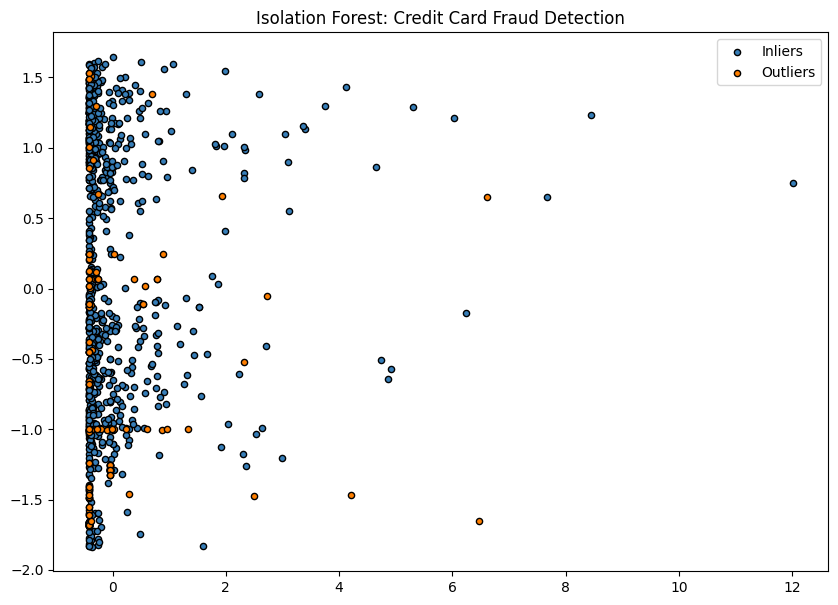

In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def Iso_outliers(df):
    # Standardize features
    X_a = StandardScaler().fit_transform(df)

    # Apply IsolationForest
    iso = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto', max_features=1, bootstrap=False, random_state=1, verbose=0, warm_start=False)
    preds = iso.fit_predict(X_a)

    # Create a DataFrame with the results
    data = pd.DataFrame()
    data['cluster'] = preds
    print(data['cluster'].value_counts().sort_values(ascending=False))

    # Plot the results
    plt.figure(figsize=(10, 7))

    # Define colors for the plot
    colors = np.array(['#377eb8', '#ff7f00'])

    # Plot inliers (1) and outliers (-1) in different colors
    inliers = X_a[preds == 1]
    outliers = X_a[preds == -1]

    plt.scatter(inliers[:, 0], inliers[:, 1], c=colors[0], edgecolor='k', s=20, label='Inliers')
    plt.scatter(outliers[:, 0], outliers[:, 1], c=colors[1], edgecolor='k', s=20, label='Outliers')

    plt.title('Isolation Forest: Credit Card Fraud Detection')
    plt.legend()
    plt.show()

Iso_outliers(X)